In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from xgboost import XGBRegressor
MAIN_COLOR = "#B388EB"
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

## 1. Data Loading and Scope
- Dataset description
- Project objectives
- Definition of prediction tasks (regression, classification, clustering)

In [3]:
df = pd.read_csv('Data/marketing_campaign.csv',sep='\t')

In [4]:
df.shape

(2240, 29)

In [5]:
df.columns
#print("Columns:", list(df.columns))

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
print("\n=== HEAD (first 5 rows) ===")
df.head()


=== HEAD (first 5 rows) ===


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
print("\n=== INFO ===")
df.info()


=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    224

In [8]:
print("\n=== DESCRIBE (numeric) ===")
display(df.select_dtypes(include="number").describe().T)


=== DESCRIBE (numeric) ===


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [9]:
df['ID'].nunique()

2240

In [10]:
print("\n=== NULL COUNTS (top) ===")
display(df.isna().sum().sort_values(ascending=False).head(20))


=== NULL COUNTS (top) ===


Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
dtype: int64

In [11]:
obj_cols = df.select_dtypes(include="object").columns.tolist()
card = {c: df[c].nunique(dropna=True) for c in obj_cols}
print("\n=== OBJECT COLUMNS & UNIQUE COUNTS ===")
for k, v in sorted(card.items(), key=lambda x: -x[1])[:20]:
    print(f"{k:25s} : {v}")


=== OBJECT COLUMNS & UNIQUE COUNTS ===
Dt_Customer               : 663
Marital_Status            : 8
Education                 : 5


In [12]:
# (Optional) quick value_counts for common fields if they exist
for c in ["Marital_Status", "Education", "Response", "Complain"]:
    if c in df.columns:
        print(f"\n=== VALUE COUNTS: {c} ===")
        display(df[c].value_counts(dropna=False).head(20))


=== VALUE COUNTS: Marital_Status ===


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


=== VALUE COUNTS: Education ===


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


=== VALUE COUNTS: Response ===


Response
0    1906
1     334
Name: count, dtype: int64


=== VALUE COUNTS: Complain ===


Complain
0    2219
1      21
Name: count, dtype: int64

## 2. Data Cleaning
- Data types and missing values
- Date processing and feature creation (Age, Tenure, TotalSpend)
- Handling obvious inconsistencies
- Initial sanity checks

In [13]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [14]:
df['Dt_Customer'] = pd.to_datetime( df['Dt_Customer'], dayfirst=True )


In [15]:
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [16]:
reference_year = df['Dt_Customer'].dt.year.max()
df['Age'] = reference_year - df['Year_Birth']

In [17]:
df['Age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [18]:
df[df['Age'] > 75][['Year_Birth', 'Age']].head()


,Year_Birth,Age
192,1900,114
239,1893,121
339,1899,115


**Observation**
A small number of customers were identified with very high ages (above 100 years), corresponding to birth years in the late 19th century.
These observations were retained at this stage and will be revisited during modeling if necessary.

In [19]:
df['Marital_Status'] = df['Marital_Status'].replace(
    ['Alone', 'Absurd', 'YOLO'],
    'Other'
)


In [20]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Other         7
Name: count, dtype: int64

Rare and non-informative categories in Marital_Status were grouped into an Other category to reduce noise while preserving meaningful classes.

In [21]:
# Check missing income rows
df[df['Income'].isna()].shape


(24, 30)

In [22]:
# Inspect missing income cases
df.loc[df['Income'].isna(), ['Education', 'Marital_Status', 'Age']].head(10)


,Education,Marital_Status,Age
10,Graduation,Married,31
27,Graduation,Single,28
43,PhD,Single,55
48,Graduation,Single,63
58,Graduation,Single,32
71,2n Cycle,Married,41
90,PhD,Married,57
91,Graduation,Single,57
92,Master,Together,41
128,PhD,Married,53


In [23]:
# Inspect extreme income values
df[['Income']].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [24]:
# High income outliers
df[df['Income'] > 200_000][['Income', 'Education', 'Age']].sort_values('Income', ascending=False)


,Income,Education,Age
2233,666666.0,Graduation,37


The Income variable contained a small number of missing values.
These were imputed using the median income to reduce sensitivity to extreme values and preserve the overall distribution.

In [25]:
# Median imputation for Income
income_median = df['Income'].median()
df['Income'] = df['Income'].fillna(income_median)


In [26]:
df['Income'].isna().sum()


np.int64(0)

The Income variable contained a small number of missing values.
These were imputed using the median income to reduce sensitivity to extreme values and preserve the overall distribution.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [28]:
reference_date = df['Dt_Customer'].max()
reference_date


Timestamp('2014-06-29 00:00:00')

In [29]:
# Create customer tenure in days
df['Tenure_Days'] = (reference_date - df['Dt_Customer']).dt.days


In [30]:
df['Tenure_Days'].describe()


count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Tenure_Days, dtype: float64

In [31]:
education_map = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

df['Education_Level'] = df['Education'].map(education_map)


In [32]:
df[['Education', 'Education_Level']].drop_duplicates().sort_values('Education_Level')


,Education,Education_Level
11,Basic,1
19,2n Cycle,2
0,Graduation,3
5,Master,4
4,PhD,5


Education was treated as an ordinal variable and mapped to a numeric scale from 1 (Basic) to 5 (PhD) to preserve the inherent educational hierarchy.

In [33]:
# Create TotalSpend feature
spend_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

df['TotalSpend'] = df[spend_cols].sum(axis=1)


In [34]:
df['TotalSpend'].describe()


count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalSpend, dtype: float64

Total customer spending was calculated by aggregating expenditures across all product categories.


## 3. Exploratory Data Analysis – General Customer Profile
- Univariate distributions of key numerical features
- Categorical feature distributions
- Initial observations on spending, income, age, and tenure


In [35]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Tenure_Days', 'Education_Level', 'TotalSpend'],
      dtype='object')

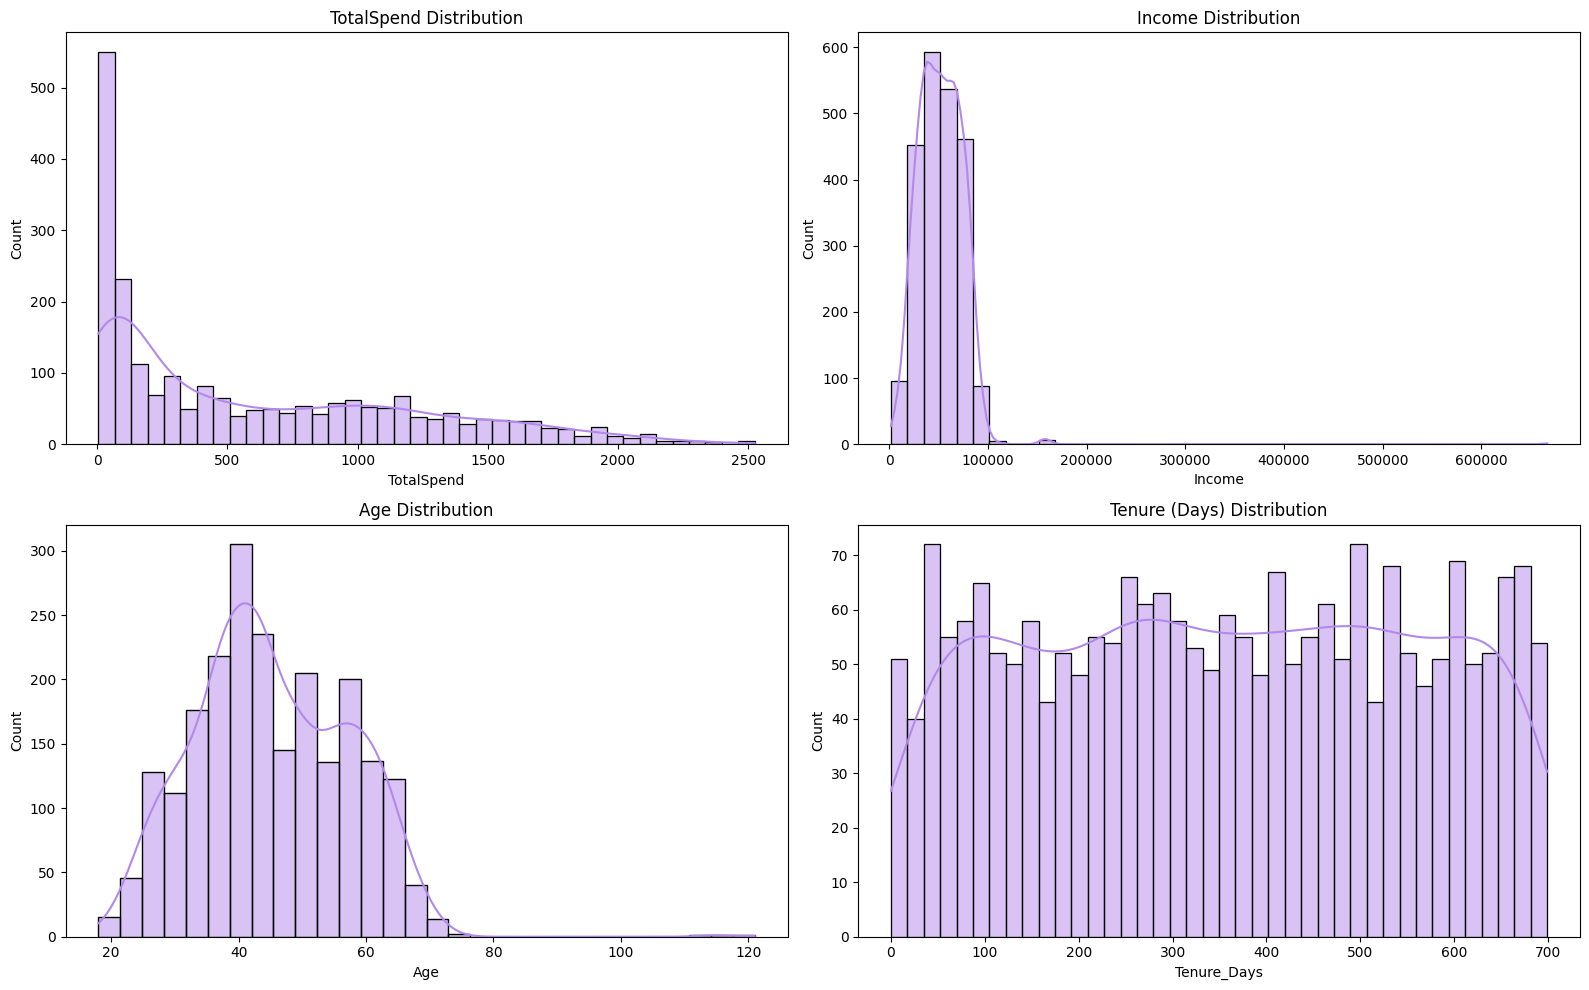

In [122]:

# Set style and color
color = '#B388EB'
plt.figure(figsize=(16, 10))

# 1) TotalSpend
plt.subplot(2, 2, 1)
sns.histplot(df['TotalSpend'], bins=40, kde=True, color=color)
plt.title('TotalSpend Distribution')

# 2) Income
plt.subplot(2, 2, 2)
sns.histplot(df['Income'], bins=40, kde=True, color=color)
plt.title('Income Distribution')

# 3) Age
plt.subplot(2, 2, 3)
sns.histplot(df['Age'], bins=30, kde=True, color=color)
plt.title('Age Distribution')

# 4) Tenure_Days
plt.subplot(2, 2, 4)
sns.histplot(df['Tenure_Days'], bins=40, kde=True, color=color)
plt.title('Tenure (Days) Distribution')


plt.tight_layout()
plt.show()


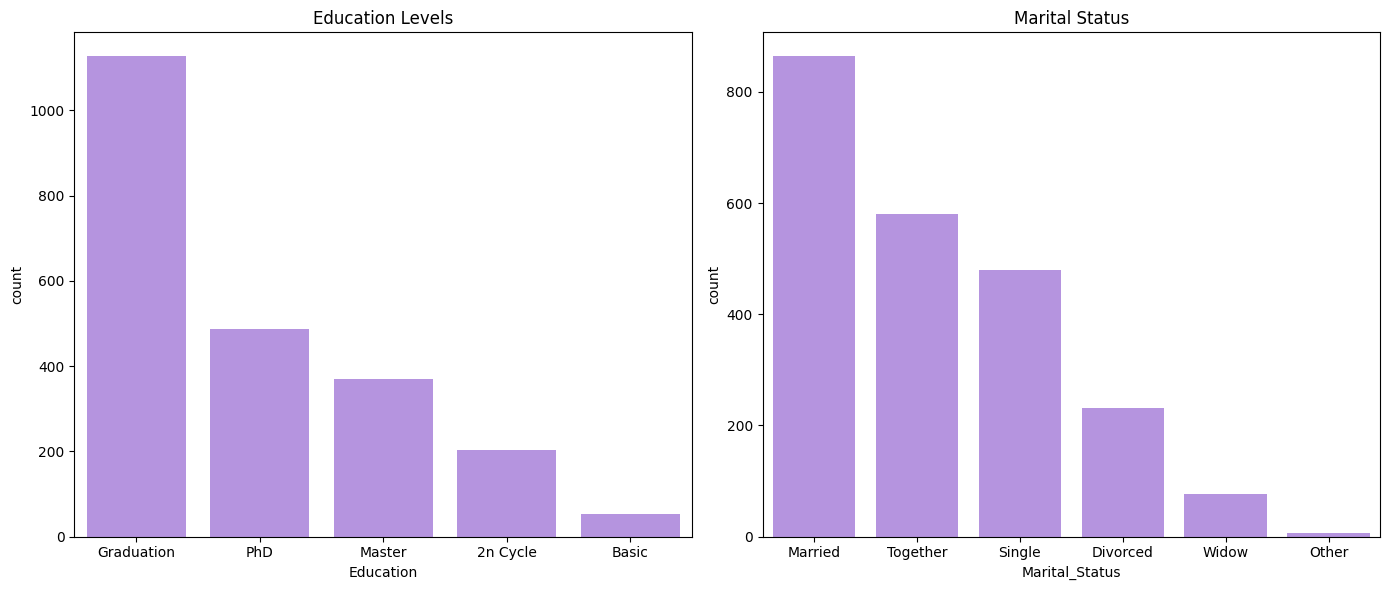

In [37]:
# Set figure
plt.figure(figsize=(14, 6))

# 1) Education
plt.subplot(1, 2, 1)
sns.countplot(
    x=df['Education'],
    order=df['Education'].value_counts().index,
    color=color
)
plt.title('Education Levels')

# 2) Marital_Status
plt.subplot(1, 2, 2)
sns.countplot(
    x=df['Marital_Status'],
    order=df['Marital_Status'].value_counts().index,
    color=color
)
plt.title('Marital Status')

plt.tight_layout()
plt.show()


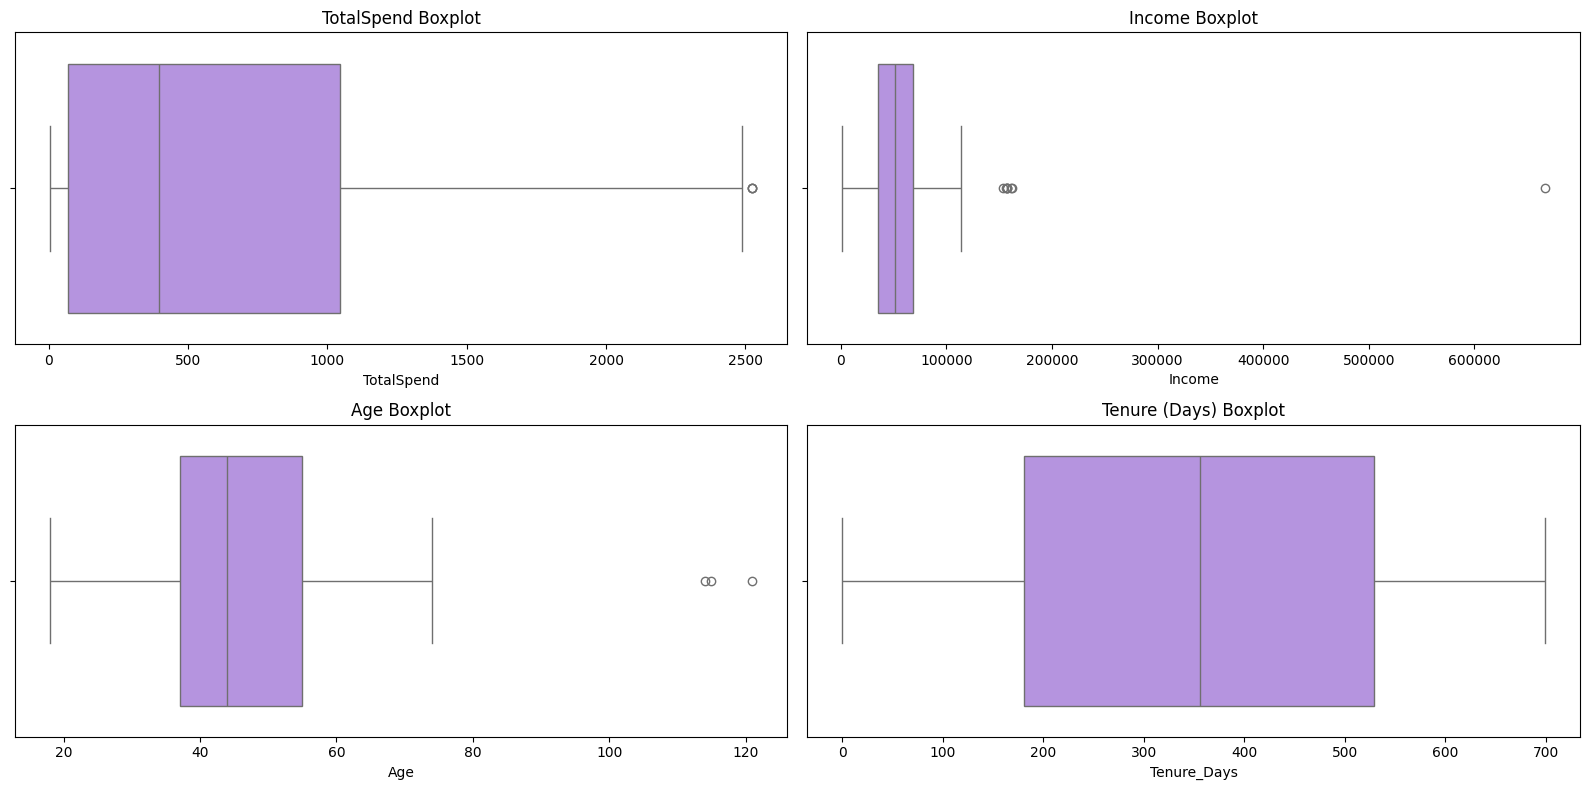

In [38]:

color = '#B388EB'

plt.figure(figsize=(16, 8))

# 1) TotalSpend
plt.subplot(2, 2, 1)
sns.boxplot(x=df['TotalSpend'], color=color)
plt.title('TotalSpend Boxplot')

# 2) Income
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Income'], color=color)
plt.title('Income Boxplot')

# 3) Age
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Age'], color=color)
plt.title('Age Boxplot')

# 4) Tenure_Days
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Tenure_Days'], color=color)
plt.title('Tenure (Days) Boxplot')

plt.tight_layout()
plt.show()


**Observation**
The numerical features TotalSpend and Income exhibit strong right-skewness and clear extreme values, indicating the presence of heavy-spender and high-income customers.

Based on these distributions, logarithmic transformation followed by standardization will be considered in later stages when applying distance-based clustering methods such as K-Means, in order to reduce the influence of extreme values.

Other numerical variables, such as Age and Customer Tenure, show more stable distributions and primarily require scaling rather than transformation.

Categorical variables do not exhibit skewness in the traditional numerical sense and are therefore better analyzed through distributional comparisons across clusters rather than numerical feature importance.

Given the multi-objective nature of the project (regression, classification, and clustering), the exploratory data analysis was conducted in a staged manner.
The initial EDA focused on understanding the overall customer profile and spending behavior, while target-specific and task-oriented analyses were deferred to later sections.


### 3.2 Exploratory Analysis for Regression (EDA – Spending Drivers)
- Correlation analysis
- Bivariate relationships with TotalSpend
- Behavioral vs demographic drivers
- Summary observations

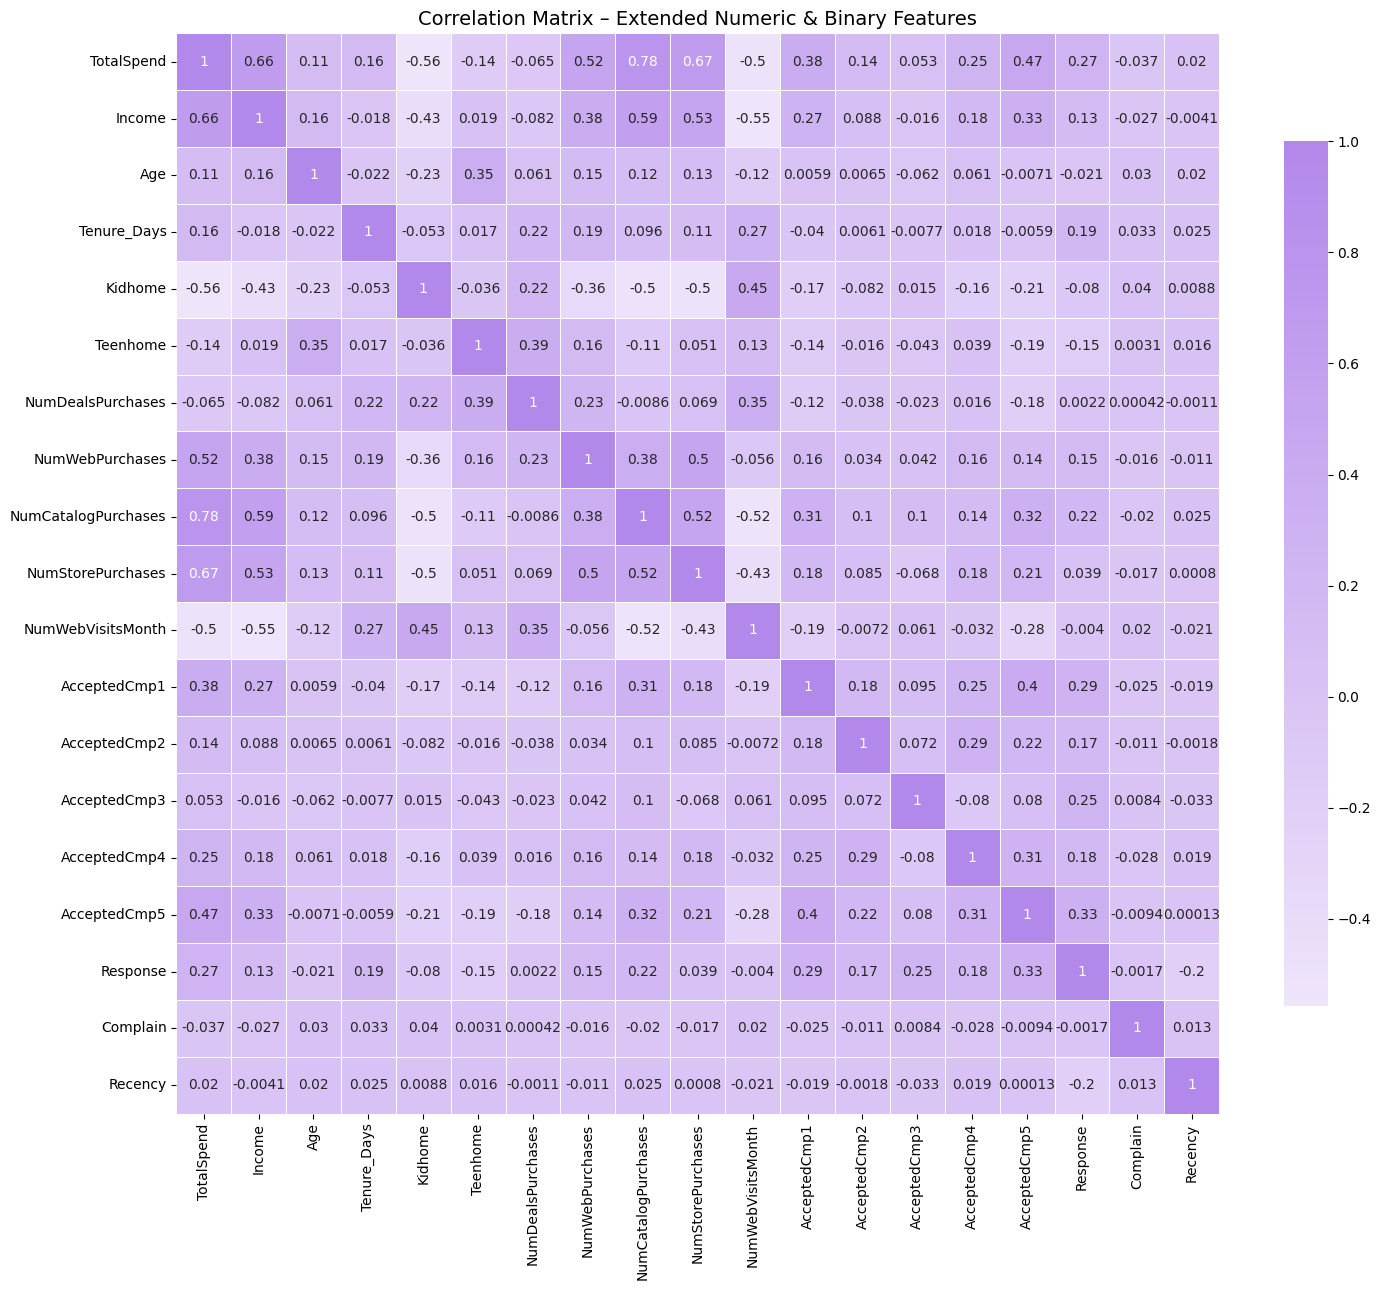

📌 Strongest correlations with TotalSpend (Spearman):
                          rho
NumCatalogPurchases  0.778577
NumStorePurchases    0.674669
Income               0.664775
Kidhome             -0.556669
NumWebPurchases      0.519837
NumWebVisitsMonth   -0.500218
AcceptedCmp5         0.470058
AcceptedCmp1         0.381523
Response             0.265298
AcceptedCmp4         0.253290
Tenure_Days          0.158814
Teenhome            -0.138384
AcceptedCmp2         0.135813
Age                  0.111306
NumDealsPurchases   -0.065112


In [115]:

from matplotlib.colors import LinearSegmentedColormap

# Columns for extended correlation analysis
corr_cols = [
    'TotalSpend',
    'Income',
    'Age',
    'Tenure_Days',
    'Kidhome',
    'Teenhome',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Response',
    'Complain',
    'Recency'
]

corr = df[corr_cols].corr()

# Custom purple colormap
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_purple',
    ['#FFFFFF', '#B388EB']
)

plt.figure(figsize=(15, 13))
sns.heatmap(
    corr,
    annot=True,
    cmap=custom_cmap,
    center=0,
    linewidths=0.4,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Matrix – Extended Numeric & Binary Features', fontsize=14)
plt.tight_layout()
plt.show()

print("📌 Strongest correlations with TotalSpend (Spearman):")

corr_total = (
    corr['TotalSpend']
    .drop('TotalSpend')
    .to_frame('rho')
)

corr_total['abs_rho'] = corr_total['rho'].abs()

print(
    corr_total
    .sort_values('abs_rho', ascending=False)
    .drop(columns='abs_rho')
    .head(15)
    .to_string()
)


Spearman correlation analysis indicates that purchasing behavior, particularly catalog and in-store purchases, exhibits the strongest association with TotalSpend. Income also shows a strong positive relationship. In contrast, household composition variables such as Kidhome display a notable negative association, while frequent website visits without purchases are linked to lower spending. Campaign acceptance variables show moderate positive associations, whereas age and tenure exhibit comparatively weaker effects.
Although Income shows moderate correlations with purchase frequency variables such as catalog and in-store purchases, the magnitude of these relationships remains below commonly used multicollinearity thresholds. Moreover, the variables represent distinct economic capacity and behavioral constructs, and were therefore retained for further modeling.

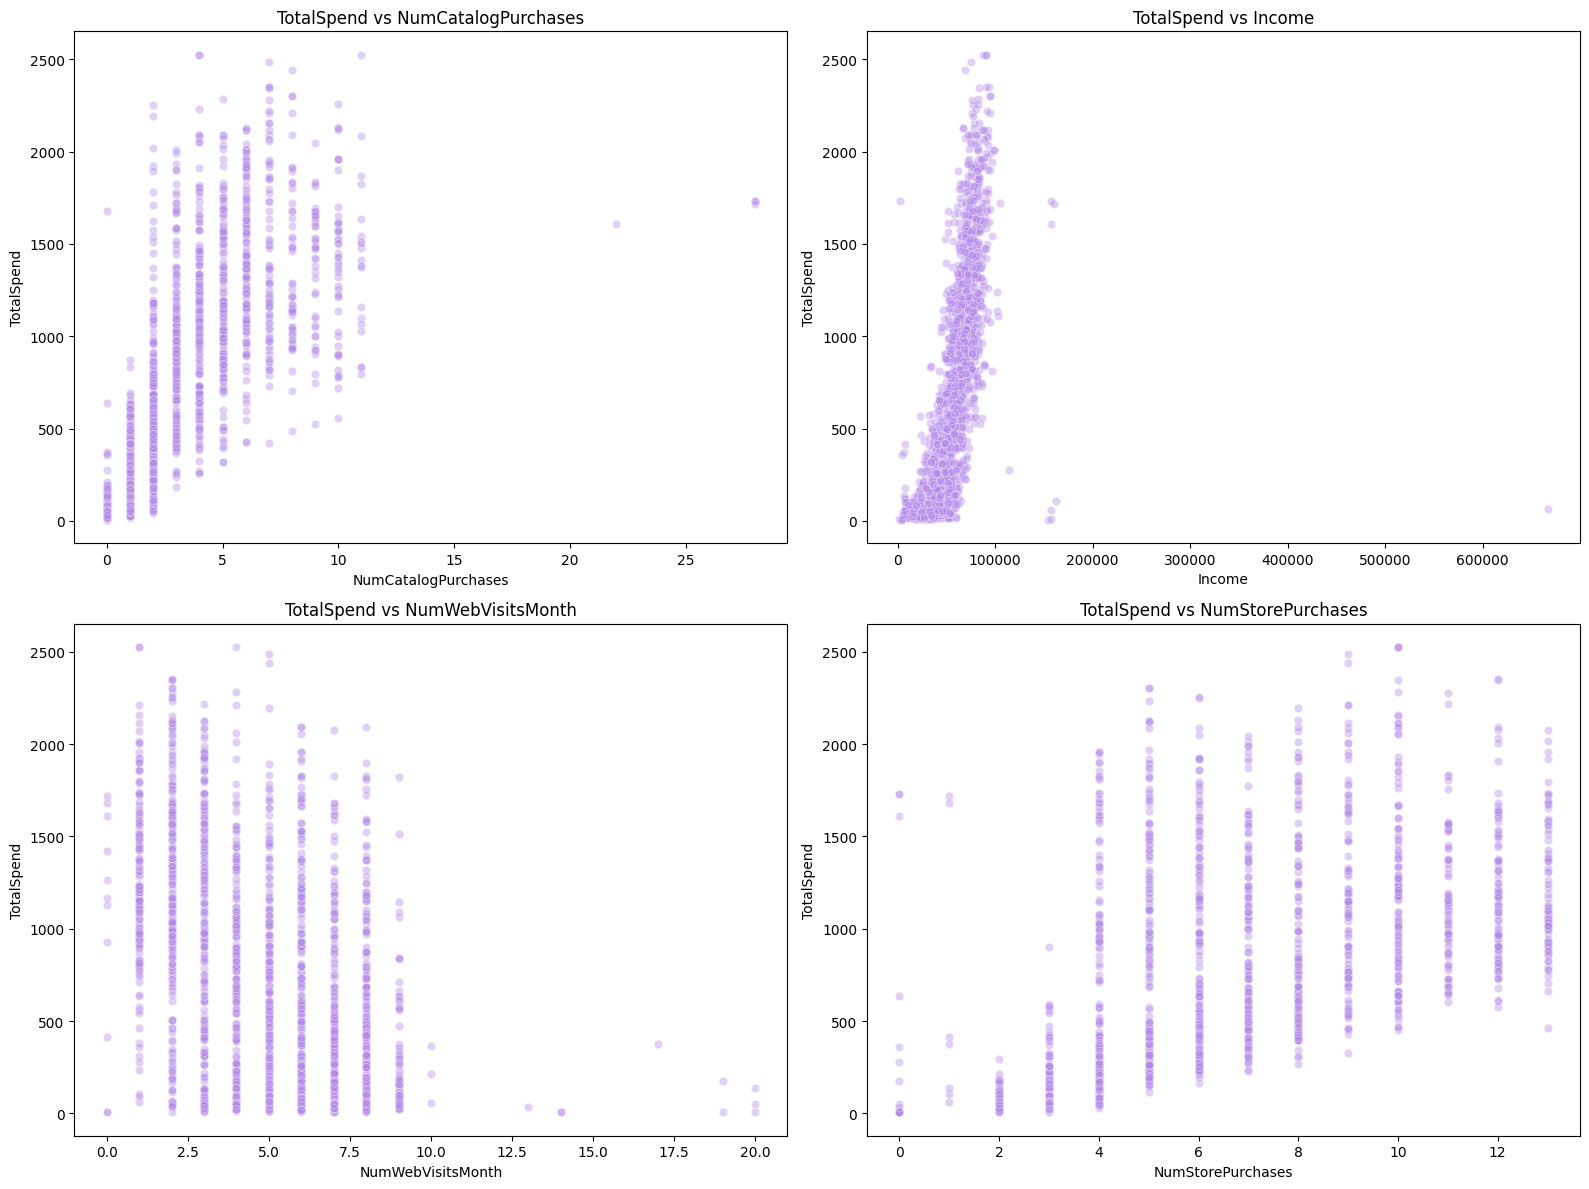

In [41]:

color = '#B388EB'

plt.figure(figsize=(16, 12))

# 1) TotalSpend vs NumCatalogPurchases
plt.subplot(2, 2, 1)
sns.scatterplot(
    x=df['NumCatalogPurchases'],
    y=df['TotalSpend'],
    alpha=0.4,
    color=color
)
plt.title('TotalSpend vs NumCatalogPurchases')

# 2) TotalSpend vs Income
plt.subplot(2, 2, 2)
sns.scatterplot(
    x=df['Income'],
    y=df['TotalSpend'],
    alpha=0.4,
    color=color
)
plt.title('TotalSpend vs Income')

# 3) TotalSpend vs NumWebVisitsMonth
plt.subplot(2, 2, 3)
sns.scatterplot(
    x=df['NumWebVisitsMonth'],
    y=df['TotalSpend'],
    alpha=0.4,
    color=color
)
plt.title('TotalSpend vs NumWebVisitsMonth')

# 4) TotalSpend vs NumStorePurchases
plt.subplot(2, 2, 4)
sns.scatterplot(
    x=df['NumStorePurchases'],
    y=df['TotalSpend'],
    alpha=0.4,
    color=color
)
plt.title('TotalSpend vs NumStorePurchases')

plt.tight_layout()
plt.show()


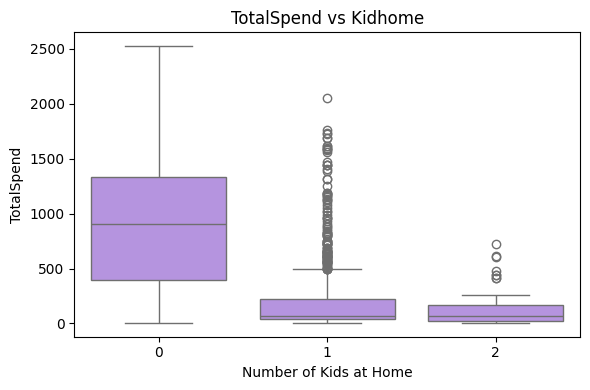

In [42]:
plt.figure(figsize=(6, 4))

sns.boxplot(
    x=df['Kidhome'],
    y=df['TotalSpend'],
    color=color
)

plt.title('TotalSpend vs Kidhome')
plt.xlabel('Number of Kids at Home')
plt.ylabel('TotalSpend')

plt.tight_layout()
plt.show()


**Observation**
Bivariate analysis reveals that TotalSpend is strongly and positively associated with purchase frequency in catalog and store channels, while frequent website visits without purchases are linked to lower spending. Household composition, particularly the presence of children, shows a pronounced negative effect on spending. Income exhibits a positive but heteroscedastic relationship with TotalSpend, indicating that purchasing behavior mediates the effect of financial capacity.

#### Observation — Bivariate EDA (Spending Drivers)


The bivariate analysis highlights that customer spending is primarily driven by purchasing behavior rather than demographic attributes alone.

Purchase frequency in catalog and in-store channels shows the strongest positive association with TotalSpend, exhibiting clear monotonic trends. In contrast, frequent website visits without corresponding purchases are associated with lower spending, suggesting browsing behavior rather than purchasing intent.

Household composition plays a substantial role: customers with children at home display markedly lower spending levels, with heavy spenders concentrated almost exclusively among households without children.

Income demonstrates a positive but heteroscedastic relationship with TotalSpend, indicating that while higher income enables higher spending, purchasing behavior mediates this effect.

These findings suggest that behavioral features are critical predictors of TotalSpend and motivate targeted feature engineering and transformation strategies in subsequent regression modeling.


### 3.3 Feature Engineering
- Transformations (log, scaling)
- Feature selection and aggregation
- Preparation for regression models


Feature engineering for regression focused on stabilizing skewed distributions through logarithmic transformations while preserving raw behavioral signals.
Outlier treatment was intentionally deferred until after baseline model evaluation.

In [113]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Tenure_Days', 'Education_Level', 'TotalSpend', 'TotalSpend_log',
       'Income_log'],
      dtype='object')

In [110]:
from scipy import stats
totalspend = df["TotalSpend"].dropna()
shapiro_stat, shapiro_p = stats.shapiro(totalspend.sample(500, random_state=42))
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value:       {shapiro_p:.6f}")


Shapiro-Wilk test statistic: 0.8832
Shapiro-Wilk p-value:       0.000000


In [43]:

# Log-transform target
df['TotalSpend_log'] = np.log1p(df['TotalSpend'])


In [112]:
from scipy import stats
totalspend_log = df["TotalSpend_log"].dropna()
shapiro_stat, shapiro_p = stats.shapiro(totalspend_log.sample(500, random_state=42))
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value:       {shapiro_p:.6f}")


Shapiro-Wilk test statistic: 0.9210
Shapiro-Wilk p-value:       0.000000


In [107]:
from scipy import stats
income = df["Income"].dropna()
shapiro_stat, shapiro_p = stats.shapiro(income.sample(500, random_state=42))
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value:       {shapiro_p:.6f}")


Shapiro-Wilk test statistic: 0.9800
Shapiro-Wilk p-value:       0.000002


In [108]:
skewness = stats.skew(income)
kurtosis = stats.kurtosis(income)

print(f"Skewness:  {skewness:.2f}")
print(f"Kurtosis:  {kurtosis:.2f}")


Skewness:  6.80
Kurtosis:  161.04


In [44]:
# Log-transform income
df['Income_log'] = np.log1p(df['Income'])


In [109]:
income_log = df["Income_log"].dropna()
shapiro_stat, shapiro_p = stats.shapiro(income_log.sample(500, random_state=42))
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value:       {shapiro_p:.6f}")


Shapiro-Wilk test statistic: 0.9262
Shapiro-Wilk p-value:       0.000000


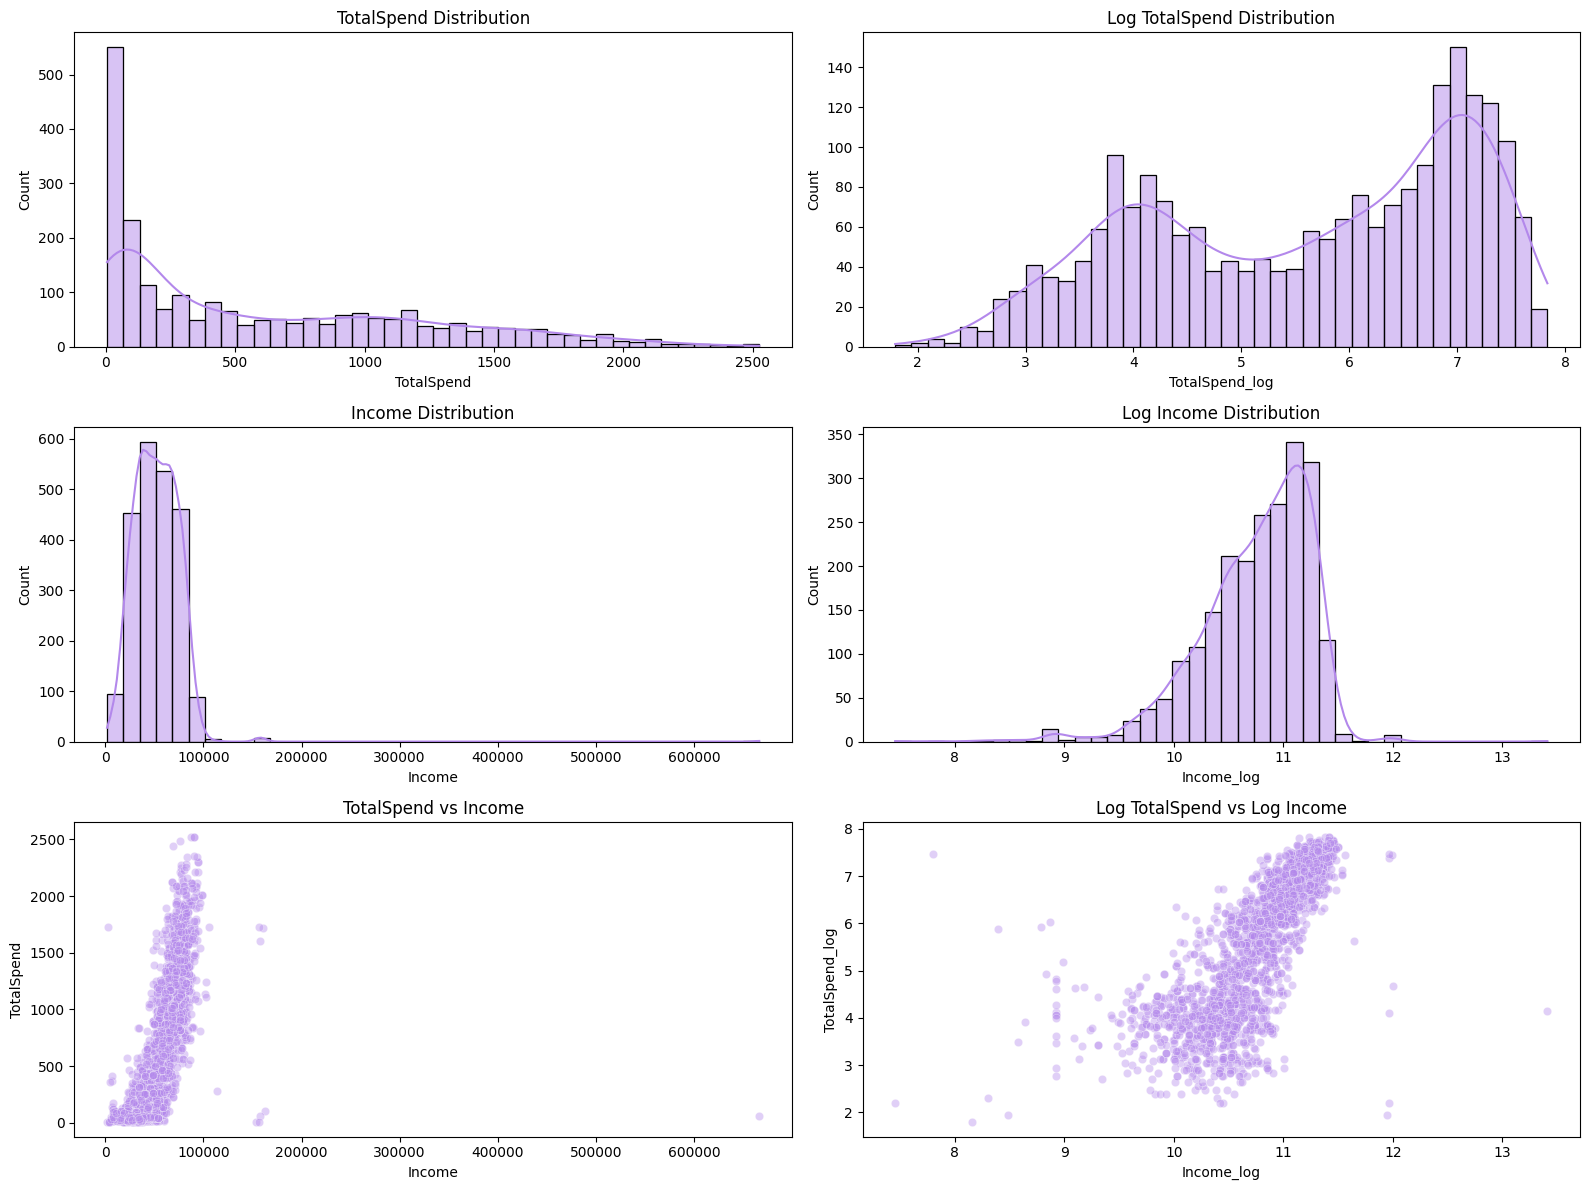

In [45]:

color = '#B388EB'

plt.figure(figsize=(16, 12))

# 1) TotalSpend
plt.subplot(3, 2, 1)
sns.histplot(df['TotalSpend'], bins=40, kde=True, color=color)
plt.title('TotalSpend Distribution')

# 2) Log TotalSpend
plt.subplot(3, 2, 2)
sns.histplot(df['TotalSpend_log'], bins=40, kde=True, color=color)
plt.title('Log TotalSpend Distribution')

# 3) Income
plt.subplot(3, 2, 3)
sns.histplot(df['Income'], bins=40, kde=True, color=color)
plt.title('Income Distribution')

# 4) Log Income
plt.subplot(3, 2, 4)
sns.histplot(df['Income_log'], bins=40, kde=True, color=color)
plt.title('Log Income Distribution')


# 5) TotalSpend vs Income
plt.subplot(3, 2, 5)
sns.scatterplot(
    x=df['Income'],
    y=df['TotalSpend'],
    alpha=0.4,
    color=color
)
plt.title('TotalSpend vs Income')

# 6) Log TotalSpend vs Log Income
plt.subplot(3, 2, 6)
sns.scatterplot(
    x=df['Income_log'],
    y=df['TotalSpend_log'],
    alpha=0.4,
    color=color
)
plt.title('Log TotalSpend vs Log Income')
plt.tight_layout()
plt.show()


#### IQR Anomaly Detection (All Relevant Numeric Features)
IQR-based anomaly detection was applied to all key numeric variables
(Income, TotalSpend, Age, Recency, Tenure, and purchase-related count features)
using raw values.

This allowed us to identify extreme observations on the original scale
before deciding whether to cap, remove, or keep them for downstream modeling.

In [188]:
import pandas as pd
import numpy as np

# ---------------------------------------
# 1) Define numeric features for anomaly detection
# ---------------------------------------
iqr_features = [
    "Income",
    "Income_log",
    "TotalSpend",
    "TotalSpend_log",
    "Age",
    "Recency",
    "Tenure_Days",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

df_iqr = df[iqr_features].copy()

# ---------------------------------------
# 2) IQR-based anomaly detection
# ---------------------------------------
iqr_results = []

for col in iqr_features:
    series = df_iqr[col].dropna()

    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = series[(series < lower_bound) | (series > upper_bound)]

    iqr_results.append({
        "feature": col,
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "n_outliers": outliers.shape[0],
        "pct_outliers": outliers.shape[0] / series.shape[0] * 100,
        "min_outlier": outliers.min() if not outliers.empty else np.nan,
        "max_outlier": outliers.max() if not outliers.empty else np.nan
    })

# ---------------------------------------
# 3) Final summary table
# ---------------------------------------
iqr_summary_df = pd.DataFrame(iqr_results)

iqr_summary_df = iqr_summary_df.sort_values(
    by="pct_outliers",
    ascending=False
).reset_index(drop=True)

iqr_summary_df


,feature,Q1,Q3,IQR,lower_bound,upper_bound,n_outliers,pct_outliers,min_outlier,max_outlier
0,NumDealsPurchases,1.000000,3.000000,2.000000,-2.000000,6.000000,86,3.839286,7.000000,15.000000
1,Income_log,10.478407,11.131530,0.653123,9.498723,12.111213,40,1.785714,7.456455,13.410046
2,NumCatalogPurchases,0.000000,4.000000,4.000000,-6.000000,10.000000,23,1.026786,11.000000,28.000000
3,Income,35538.750000,68289.750000,32751.000000,-13587.750000,117416.250000,8,0.357143,153924.000000,666666.000000
4,NumWebVisitsMonth,3.000000,7.000000,4.000000,-3.000000,13.000000,8,0.357143,14.000000,20.000000
5,NumWebPurchases,2.000000,6.000000,4.000000,-4.000000,12.000000,4,0.178571,23.000000,27.000000
6,TotalSpend,68.750000,1045.500000,976.750000,-1396.375000,2510.625000,3,0.133929,2524.000000,2525.000000
7,Age,37.000000,55.000000,18.000000,10.000000,82.000000,3,0.133929,114.000000,121.000000
8,TotalSpend_log,4.244898,6.953206,2.708308,0.182436,11.015668,0,0.000000,NaN,NaN
9,Recency,24.000000,74.000000,50.000000,-51.000000,149.000000,0,0.000000,NaN,NaN


**Observation**
Using the IQR method, a small number of extreme values were identified, primarily in Income and Age.
These outliers were not removed, but capped at the upper IQR boundary (winsorized), in order to reduce undue leverage while preserving the overall data structure.
Count-based features exhibited natural right-tailed distributions and were therefore left unchanged.

Interestingly, applying the IQR rule on log-transformed income identifies a larger number of outliers than on raw income.
This is expected, as the log transformation compresses the upper tail and tightens the central distribution, making moderately high incomes appear relatively distant from the median.
These observations do not necessarily indicate data errors and were therefore not removed.

In [189]:
def iqr_cap(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - k * iqr
    upper = q3 + k * iqr

    capped = series.clip(lower=lower, upper=upper)
    return capped, lower, upper


In [206]:
# Income → conservative capping
df["Income_capped"], income_lb, income_ub = iqr_cap(df["Income"], k=1.5)

# Age → standard capping
df["Age_capped"], age_lb, age_ub = iqr_cap(df["Age"], k=1.5)

print("Income bounds (3×IQR):", income_lb, income_ub)
print("Age bounds (1.5×IQR):", age_lb, age_ub)


Income bounds (3×IQR): -13587.75 117416.25
Age bounds (1.5×IQR): 10.0 82.0


Since income distributions are typically highly right-skewed, a more conservative outlier treatment was applied.
Income values were capped using a 3×IQR threshold, while Age and other numeric variables used the standard 1.5×IQR rule.
The original variables were retained, and capped versions were created to assess model robustness.

In [207]:
df["Income_capped_log"] = np.log1p(df["Income_capped"])
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Tenure_Days', 'Education_Level', 'TotalSpend', 'TotalSpend_log',
       'Income_log', 'Income_capped', 'Age_capped', 'Income_capped_log'],
      dtype='object')

#### Anomaly Detection Pipeline (3 Methods)

In [173]:
num_cols = [
    "Income",
    "TotalSpend",
    "Tenure_Days",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "Age"
]


In [174]:
import numpy as np

X_raw = df[num_cols].values

USE_LOG1P = True
X = np.log1p(X_raw) if USE_LOG1P else X_raw


In [175]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Xs.shape


(2240, 10)

#### METHOD 1 — Z-score (Global, Multivariate)

In [176]:
import numpy as np

# Mean absolute Z-score across features
zscores = np.abs(Xs).mean(axis=1)

alert_rate = 0.05  # top 5% anomalies
k = int(np.ceil(alert_rate * len(zscores)))

idx_z = np.argsort(-zscores)[:k]

len(idx_z)


112

#### METHOD 2 — Isolation Forest

In [177]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    contamination=0.05,
    random_state=42
)

iso.fit(Xs)

# Higher score = more anomalous
score_iso = -iso.score_samples(Xs)

idx_iso = np.argsort(-score_iso)[:k]

len(idx_iso)


112

#### METHOD 3 — Local Outlier Factor (LOF)

In [178]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.05
)

pred_lof = lof.fit_predict(Xs)   # -1 outlier, 1 inlier
score_lof = -lof.negative_outlier_factor_

idx_lof = np.where(pred_lof == -1)[0]

len(idx_lof)


112

In [186]:
#S_z   = set(idx_z.tolist())
S_iso = set(idx_iso.tolist())
S_lof = set(idx_lof.tolist())

#print("Z-score only:", len(S_z))
print("Isolation Forest only:", len(S_iso))
print("LOF only:", len(S_lof))

#print("Z ∩ ISO:", len(S_z & S_iso))
print("ISO ∩ LOF:", len(S_iso & S_lof))
#print("Z ∩ LOF:", len(S_z & S_lof))

#print("All three agree:", len(S_z & S_iso & S_lof))
print("All two agree:", len(  S_iso & S_lof))

Isolation Forest only: 112
LOF only: 112
ISO ∩ LOF: 65
All two agree: 65


In [ ]:
import pandas as pd

#rank_z   = pd.Series(zscores).rank(ascending=False)
rank_iso = pd.Series(score_iso).rank(ascending=False)
rank_lof = pd.Series(score_lof).rank(ascending=False)

#rank_avg = (rank_z + rank_iso + rank_lof) / 3
rank_avg = (rank_iso + rank_lof) / 2

review = pd.DataFrame({
    "rank_avg": rank_avg,
    #"zscore": zscores,
    "iso_score": score_iso,
    "lof_score": score_lof
}).sort_values("rank_avg")

#review["flag_z"]   = review.index.isin(S_z).astype(int)
review["flag_iso"] = review.index.isin(S_iso).astype(int)
review["flag_lof"] = review.index.isin(S_lof).astype(int)

review_out = pd.concat([review, df[num_cols]], axis=1)

pd.set_option("display.max_rows", None)
review_out.head(65)


**Observation**
Although multivariate methods such as LOF and Isolation Forest were explored,
they were not retained for the final analysis.
These methods are better suited for detecting subtle behavioral deviations in homogeneous feature spaces.
In our case, extreme values in key variables such as Income and Age represent clear univariate anomalies with strong business relevance.
Therefore, a transparent and distribution-based approach (IQR) was preferred to ensure interpretability and consistency across models.

## 4. Regression Modeling – TotalSpend Prediction

### 4.1 Framework & Evaluation Setup
- Unified evaluation metrics (R², MSE, CV)
- Shared logging system for model comparison

### 4.2 Regression Models

#### 4.3.1 Model 1 — Baseline Linear Regression (All Features, CV)
- Benchmark model using all available features

#### 4.3.2 Model 2 — Linear Regression (EDA-based Feature Selection, CV)
- Reduced feature set selected based on EDA insights

#### 4.3.3 Model 3 — Ridge Regression (All Features, CV)
- Regularization to address multicollinearity

#### 4.3.4 Model 4 — LassoCV (All Features)
- Automatic feature selection via L1 regularization

#### 4.3.5 Model 5 — Lasso Regression (Fixed Alpha, All Features)
- Lasso model using best alpha from cross-validation

#### 4.3.6 Model 6 — Linear Regression (Lasso-selected Features)
- Linear model trained on features selected by Lasso

#### 4.3.7 Model 7 — Polynomial Linear Regression (Degree = 2, All Features, CV)
- Capturing non-linear relationships with polynomial features

#### 4.3.8 Model 8 — Polynomial Ridge Regression (Degree = 2, CV)
- Regularized polynomial regression

#### 4.3.9 Model 9 — Polynomial LassoCV (Degree = 2)
- Feature selection in polynomial feature space

#### 4.3.10 Model 10 — Model 4.3.10 — Polynomial Lasso (degree = 2, fixed α)
- Polynomial Lasso model using best alpha from cross-validation

#### 4.3.11 Model 11 — Linear Regression (on Polynomial Lasso–selected features)
- Linear regression using selected polynomial terms

#### 4.3.12 Model 12 — Decision Tree Regressor (Baseline)
- Non-linear model without preprocessing assumptions

#### 4.3.13 Model 13 — Tuned Decision Tree Regressor (GridSearchCV via CV)
- Complexity pruning using cost-complexity pruning

#### 4.3.14 Model 14 — Tuned Decision Tree Regressor (ccp_alpha via CV)
- Complexity pruning using cost-complexity pruning

#### 4.3.15 Model 15 — Decision Tree Regressor (Fixed Best ccp_alpha)
- Final tree model with selected pruning parameter

#### 4.3.16 Model 16 — Random Forest Regressor (Baseline, OOB)
- Ensemble model with out-of-bag evaluation

#### 4.3.17 Model 18 — Tuned Random Forest Regressor (GridSearchCV)
- Hyperparameter tuning for improved generalization

#### 4.3.18 Model 18 — Support Vector Regression (RBF Kernel)

- Applied on reduced feature set or sampled data

#### 4.3.19 Model 19 — Final Regression Model (Best Performing)
- Selected based on test performance and stability


## 4. Regression Modeling – TotalSpend Prediction

### 4.1 Framework & Evaluation Setup

In [ ]:
# ============================================
# 📊 Regression Model Logger (Global Framework)
# ============================================

import pandas as pd

# Initialize model log once

model_log = []


def _rnd(x, n):
    """Round numeric values safely."""
    return round(float(x), n) if x is not None else None


def log_model_result(
    name,
    r2_train,
    r2_test,
    mse_train,
    mse_test,
    r2_cv=None,
    feature_count=None,
    notes=None
):
    """
    Append one regression model result to the global model_log.
    Prevents duplicate model names.
    """
    global model_log

    if any(entry["Model"] == name for entry in model_log):
        return

    model_log.append({
        "Model": name,
        "R²_train": _rnd(r2_train, 3),
        "R²_test": _rnd(r2_test, 3),
        "R²_CV": _rnd(r2_cv, 3) if r2_cv is not None else None,
        "MSE_train": _rnd(mse_train, 2),
        "MSE_test": _rnd(mse_test, 2),
        "Feature_count": int(feature_count) if feature_count is not None else None,
        "Notes": notes
    })


def get_model_summary(sort_by="R²_test", ascending=False):
    """
    Return a clean DataFrame of all logged regression models.
    """
    df = pd.DataFrame(model_log)

    if df.empty:
        return df

    if sort_by in df.columns:
        df = df.sort_values(sort_by, ascending=ascending, ignore_index=True)

    return df

### 4.3 Regression Models

#### 4.3.1 Model 1 — Baseline Linear Regression (All Features, CV)
- Benchmark model using all available features

In [52]:
# ============================================================
# Model 1 — Baseline Linear Regression (All Features, CV)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # log1p(TotalSpend), created in 4.2

# ------------------------------------------------------------
# 2) Feature sets — ALL reasonable features
# ------------------------------------------------------------

num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) Pipeline
# ------------------------------------------------------------
pipe_lr = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lr", LinearRegression())
    ]
)

# ------------------------------------------------------------
# 6) Cross-validation (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    pipe_lr,
    X_train,
    y_train,
    cv=cv,
    scoring="r2"
)
r2_cv_mean = cv_scores.mean()

# ------------------------------------------------------------
# 7) Fit final model
# ------------------------------------------------------------
pipe_lr.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lr.predict(X_train)
y_test_pred  = pipe_lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Feature count after OHE
# ------------------------------------------------------------
encoder = pipe_lr.named_steps["pre"].transformers_[1][1]
cat_feature_counts = [len(cats) - 1 for cats in encoder.categories_]
feature_count = len(num_cols) + sum(cat_feature_counts)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 1 — Baseline Linear Regression (All Features, CV)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 1 — Baseline Linear Regression (All Features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count,
    notes="All features, log target, no outlier removal"
)


📊 Model 1 — Baseline Linear Regression (All Features, CV)
R² (train): 0.882
R² (test) : 0.882
R² (CV mean): 0.874
MSE (train): 0.26
MSE (test) : 0.24
Final feature count: 27


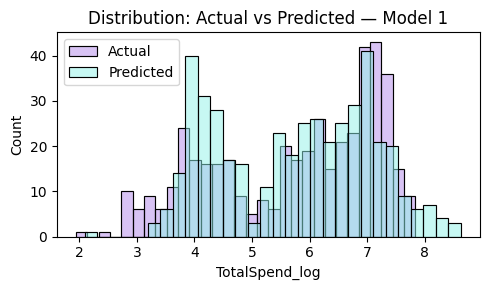

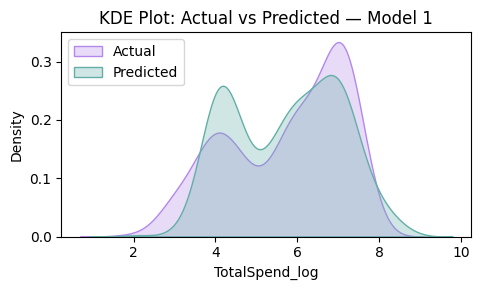

In [53]:

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual",color="#B388EB", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted",color="#91F3E9FF", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 1")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual",color="#B388EB", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted",color="#63AFA8FF", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 1")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.2 Model 2 — Linear Regression (EDA-based Feature Selection, CV)
- Reduced feature set selected based on EDA insights

In [54]:
# ============================================================
# Model 2 — Linear Regression (EDA-based features, CV)
# ============================================================

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Feature sets (EDA-based)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebPurchases",
    "NumWebVisitsMonth",
    "Kidhome",
    "Tenure_Days",
    "Age"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp5",
    "AcceptedCmp1",
    "AcceptedCmp4",
    "Response"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
])

# ------------------------------------------------------------
# 5) Pipeline
# ------------------------------------------------------------
pipe_lr = Pipeline([
    ("pre", preprocessor),
    ("lr", LinearRegression())
])

# ------------------------------------------------------------
# 6) Cross-validation (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring="r2")
r2_cv_mean = cv_scores.mean()

# ------------------------------------------------------------
# 7) Fit final model
# ------------------------------------------------------------
pipe_lr.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lr.predict(X_train)
y_test_pred  = pipe_lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Feature count after OHE
# ------------------------------------------------------------
encoder = pipe_lr.named_steps["pre"].transformers_[1][1]
cat_feature_counts = [len(cats) - 1 for cats in encoder.categories_]
feature_count = len(num_cols) + sum(cat_feature_counts)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 2 — Linear Regression (EDA-based features, CV)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 2 — Linear Regression (EDA-based features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count,
    notes="Log target, EDA-based features, no outlier removal"
)


📊 Model 2 — Linear Regression (EDA-based features, CV)
R² (train): 0.867
R² (test) : 0.865
R² (CV mean): 0.860
MSE (train): 0.29
MSE (test) : 0.27
Final feature count: 21


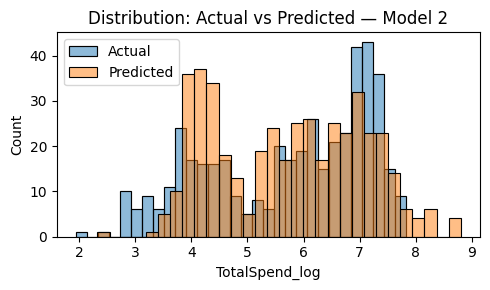

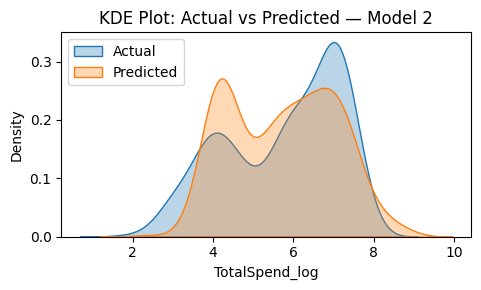

In [55]:
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 2")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 2")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.3 Model 3 — Ridge Regression (All Features, CV)
- Regularization to address multicollinearity


In [56]:
# ============================================================
# Model 4.3.3 — Ridge Regression (All Features, CV)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Feature sets — SAME as Model 4.3.1 (All Features)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) RidgeCV (inner CV for alpha)
# ------------------------------------------------------------
alphas = np.logspace(-3, 3, 50)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = RidgeCV(
    alphas=alphas,
    cv=cv_inner,
    scoring="r2"
)

# ------------------------------------------------------------
# 6) Pipeline
# ------------------------------------------------------------
pipe_ridge = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("ridge", ridge)
    ]
)

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_ridge.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_ridge.predict(X_train)
y_test_pred  = pipe_ridge.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Outer CV (stability check)
# ------------------------------------------------------------
cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_ridge,
    X_train,
    y_train,
    cv=cv_outer,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 10) Feature count
# ------------------------------------------------------------
encoder = pipe_ridge.named_steps["pre"].transformers_[1][1]
cat_feature_counts = [len(cats) - 1 for cats in encoder.categories_]
feature_count = len(num_cols) + sum(cat_feature_counts)

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.3 — Ridge Regression (All Features, CV)")
print(f"Best α: {pipe_ridge.named_steps['ridge'].alpha_:.5f}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 3 — Ridge Regression (All Features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count,
    notes="All features, log target, RidgeCV"
)


📊 Model 4.3.3 — Ridge Regression (All Features, CV)
Best α: 44.98433
R² (train): 0.881
R² (test) : 0.884
R² (CV mean): 0.875
MSE (train): 0.26
MSE (test) : 0.23
Final feature count: 27


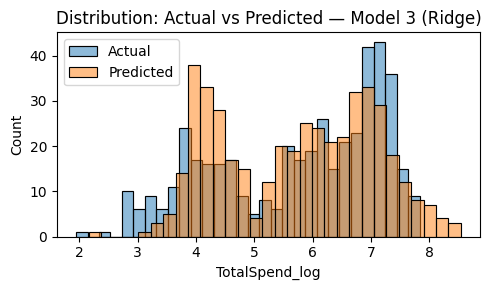

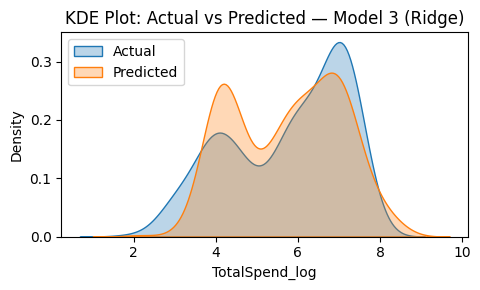

In [57]:
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 3 (Ridge)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 3 (Ridge)")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.4 Model 4 — LassoCV (All Features)
- Automatic feature selection via L1 regularization

In [58]:
# ============================================================
# Model 4.3.4 — LassoCV (All Features, CV + Feature Selection)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Feature sets — SAME as Model 4.3.1 (All Features)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) LassoCV (inner CV for alpha selection)
# ------------------------------------------------------------
alphas = np.logspace(-4, 1, 50)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

lasso = LassoCV(
    alphas=alphas,
    cv=cv_inner,
    max_iter=50000,
    random_state=42
)

# ------------------------------------------------------------
# 6) Pipeline
# ------------------------------------------------------------
pipe_lasso = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lasso", lasso)
    ]
)

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_lasso.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lasso.predict(X_train)
y_test_pred  = pipe_lasso.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Outer CV (stability check)
# ------------------------------------------------------------
cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_lasso,
    X_train,
    y_train,
    cv=cv_outer,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 10) Selected (non-zero) features
# ------------------------------------------------------------
feature_names = pipe_lasso.named_steps["pre"].get_feature_names_out()
coefs = pipe_lasso.named_steps["lasso"].coef_

selected = [(n, c) for n, c in zip(feature_names, coefs) if c != 0]
selected_sorted = sorted(selected, key=lambda x: abs(x[1]), reverse=True)
n_selected = len(selected)

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.4 — LassoCV (All Features, CV)")
print(f"Best α: {pipe_lasso.named_steps['lasso'].alpha_:.6f}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nSelected (non-zero) features: {n_selected} / {len(feature_names)}")
for name, coef in selected_sorted:
    print(f"  {name:45s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 4 — LassoCV (All Features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=n_selected,
    notes="All features, log target, LassoCV feature selection"
)


📊 Model 4.3.4 — LassoCV (All Features, CV)
Best α: 0.003393
R² (train): 0.881
R² (test) : 0.883
R² (CV mean): 0.875
MSE (train): 0.26
MSE (test) : 0.24

Selected (non-zero) features: 18 / 27
  num__Income_log                                coef = +0.3805
  num__NumCatalogPurchases                       coef = +0.3764
  num__NumWebPurchases                           coef = +0.3749
  num__NumStorePurchases                         coef = +0.3358
  num__Kidhome                                   coef = -0.2408
  cat__AcceptedCmp4_1                            coef = +0.2181
  num__NumDealsPurchases                         coef = +0.1959
  num__Teenhome                                  coef = -0.1499
  cat__AcceptedCmp5_1                            coef = +0.1353
  cat__Response_1                                coef = +0.0864
  num__Tenure_Days                               coef = +0.0840
  cat__Education_Level_5                         coef = -0.0398
  num__NumWebVisitsMonth                 

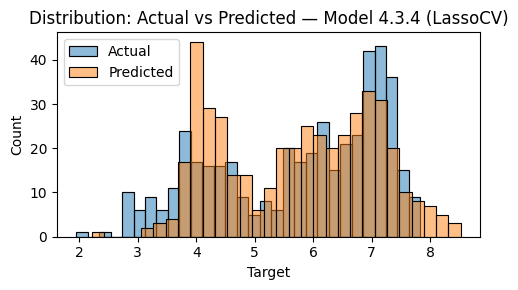

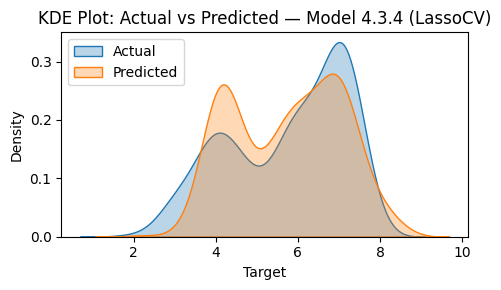

In [59]:
# ==========================================
# Distribution & KDE plots for Model 4.3.4
# ==========================================

# Histogram: Actual vs Predicted
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.4 (LassoCV)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# KDE plot: Actual vs Predicted
plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.4 (LassoCV)")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.5 Model 5 — Lasso Regression (Fixed Alpha, All Features)
- Lasso model using best alpha from cross-validation


In [60]:
# ============================================================
# Model 4.3.5 — Lasso Regression (Fixed Alpha, All Features)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Feature sets — SAME as Model 4.3.1 (All Features)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) Lasso with fixed alpha
# ------------------------------------------------------------
alpha_fixed = 0.03   # chosen based on LassoCV results (Model 4.3.4)

lasso_fixed = Lasso(
    alpha=alpha_fixed,
    max_iter=50000,
    random_state=42
)

# ------------------------------------------------------------
# 6) Pipeline
# ------------------------------------------------------------
pipe_lasso_fixed = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lasso", lasso_fixed)
    ]
)

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_lasso_fixed.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lasso_fixed.predict(X_train)
y_test_pred  = pipe_lasso_fixed.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) External CV (for comparison / display only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_lasso_fixed,
    X_train,
    y_train,
    cv=cv,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 10) Selected (non-zero) features
# ------------------------------------------------------------
feature_names = pipe_lasso_fixed.named_steps["pre"].get_feature_names_out()
coefs = pipe_lasso_fixed.named_steps["lasso"].coef_

selected = [(n, c) for n, c in zip(feature_names, coefs) if c != 0]
selected_sorted = sorted(selected, key=lambda x: abs(x[1]), reverse=True)
n_selected = len(selected)

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.5 — Lasso Regression (Fixed Alpha)")
print(f"Alpha (fixed): {alpha_fixed}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}  ← display only")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nSelected (non-zero) features: {n_selected} / {len(feature_names)}")
for name, coef in selected_sorted:
    print(f"  {name:45s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 5 — Lasso (Fixed Alpha, All Features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=n_selected,
    notes="All features, log target, fixed alpha from LassoCV"
)


📊 Model 4.3.5 — Lasso Regression (Fixed Alpha)
Alpha (fixed): 0.03
R² (train): 0.873
R² (test) : 0.879
R² (CV mean, 5-fold): 0.868  ← display only
MSE (train): 0.28
MSE (test) : 0.24

Selected (non-zero) features: 8 / 27
  num__NumCatalogPurchases                       coef = +0.4151
  num__Income_log                                coef = +0.3764
  num__NumWebPurchases                           coef = +0.3687
  num__NumStorePurchases                         coef = +0.3470
  num__Kidhome                                   coef = -0.2159
  num__NumDealsPurchases                         coef = +0.1322
  num__Teenhome                                  coef = -0.1105
  num__Tenure_Days                               coef = +0.0658


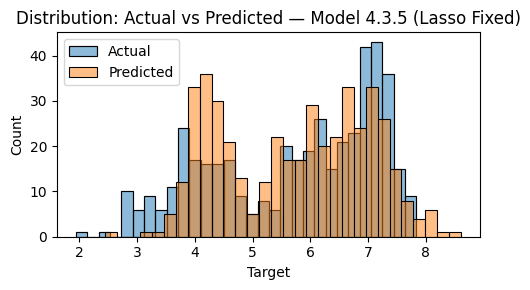

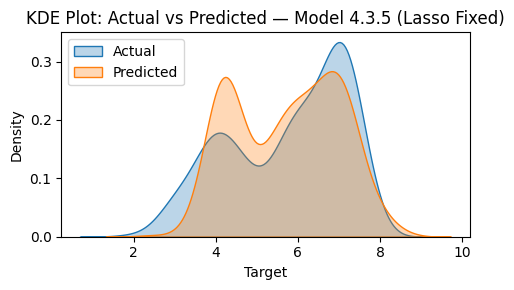

In [61]:
# ==========================================
# Distribution & KDE plots for Model 4.3.5
# ==========================================

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.5 (Lasso Fixed)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.5 (Lasso Fixed)")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.5.1 Lasso Coefficient Path Analysis

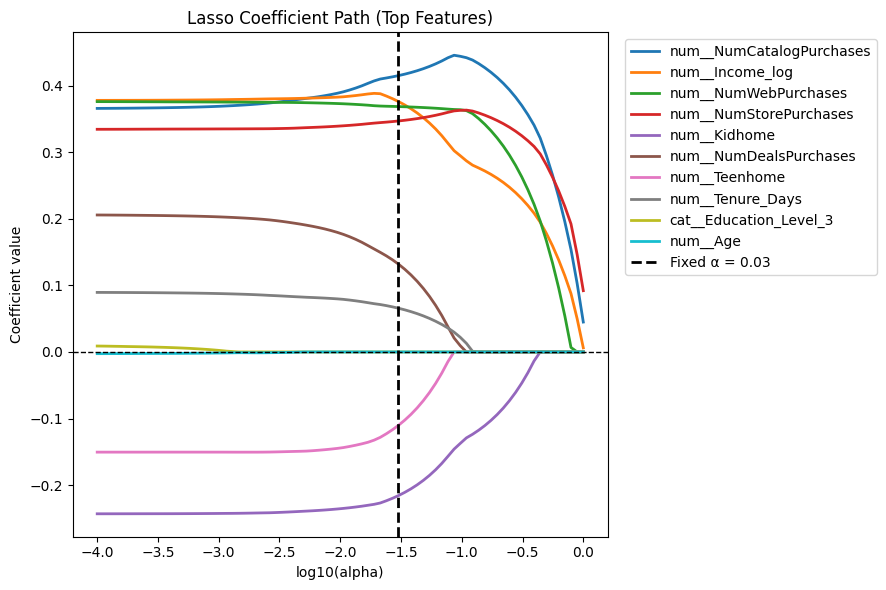

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# ------------------------------------------------------------
# Prepare design matrix (after preprocessing)
# ------------------------------------------------------------
X_train_prepared = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()

# ------------------------------------------------------------
# Define alpha grid for coefficient path
# ------------------------------------------------------------
alphas = np.logspace(-4, 0, 80)  # from very weak to strong regularization

coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=50000)
    lasso.fit(X_train_prepared, y_train)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

# ------------------------------------------------------------
# Select top features based on |coef| at fixed alpha
# ------------------------------------------------------------
alpha_fixed = 0.03

# find closest alpha index
idx_fixed = np.argmin(np.abs(alphas - alpha_fixed))
coef_at_fixed = coefs[idx_fixed]

top_idx = np.argsort(np.abs(coef_at_fixed))[-10:]  # top 10 features
top_features = feature_names[top_idx]

# --- order features by importance at fixed alpha (descending) ---
coef_fixed_abs = np.abs(coef_at_fixed)

# indices of top features, sorted from most important to least
top_idx_sorted = np.argsort(coef_fixed_abs)[-10:][::-1]


# ------------------------------------------------------------
# Plot coefficient paths
# ------------------------------------------------------------
plt.figure(figsize=(9, 6))

for i in top_idx_sorted:
    plt.plot(
        np.log10(alphas),
        coefs[:, i],
        linewidth=2,
        label=feature_names[i]
    )

# vertical line for fixed alpha
plt.axvline(
    np.log10(alpha_fixed),
    color="black",
    linestyle="--",
    linewidth=2,
    label=f"Fixed α = {alpha_fixed}"
)

# horizontal zero line
plt.axhline(
    y=0,
    color="black",
    linestyle="--",
    linewidth=1
)

# force y-limits to include zero
y_min = coefs[:, top_idx_sorted].min()
y_max = coefs[:, top_idx_sorted].max()
pad = 0.05 * (y_max - y_min)
plt.ylim(y_min - pad, y_max + pad )

plt.xlabel("log10(alpha)")
plt.ylabel("Coefficient value")
plt.title("Lasso Coefficient Path (Top Features)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


#### 4.3.6 Model 6 — Linear Regression (Lasso-selected Features)
- Linear model trained on features selected by Lasso

In [63]:
# ============================================================
# Model 4.3.6 — Linear Regression (Lasso-selected features, α = 0.03)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Lasso-selected features (α = 0.03)
# ------------------------------------------------------------
num_cols = [
    "NumCatalogPurchases",
    "Income_log",
    "NumWebPurchases",
    "NumStorePurchases",
    "Kidhome",
    "NumDealsPurchases",
    "Teenhome",
    "Tenure_Days"
]

X = df[num_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor (numerical only)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)
    ]
)

# ------------------------------------------------------------
# 5) Pipeline: preprocessing + Linear Regression
# ------------------------------------------------------------
pipe_lr_lasso = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("linreg", LinearRegression())
    ]
)

# ------------------------------------------------------------
# 6) Cross-validated R² (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_lr_lasso,
    X_train,
    y_train,
    cv=cv,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_lr_lasso.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lr_lasso.predict(X_train)
y_test_pred  = pipe_lr_lasso.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Coefficient table
# ------------------------------------------------------------
coefs = pipe_lr_lasso.named_steps["linreg"].coef_
coef_table = sorted(
    zip(num_cols, coefs),
    key=lambda x: abs(x[1]),
    reverse=True
)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 4.3.6 — Linear Regression (Lasso-selected features, α = 0.03)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nFinal feature count: {len(num_cols)}")
print("\nSelected coefficients (sorted by |coef|):")
for name, c in coef_table:
    print(f"{name:30s}  coef = {c:+.4f}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 6 — Linear Regression (Lasso-selected features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=len(num_cols),
    notes="Linear regression on 8 features selected by Lasso (α=0.03)"
)


📊 Model 4.3.6 — Linear Regression (Lasso-selected features, α = 0.03)
R² (train): 0.876
R² (test) : 0.885
R² (CV mean, 5-fold): 0.871
MSE (train): 0.27
MSE (test) : 0.23

Final feature count: 8

Selected coefficients (sorted by |coef|):
Income_log                      coef = +0.4165
NumCatalogPurchases             coef = +0.3979
NumWebPurchases                 coef = +0.3711
NumStorePurchases               coef = +0.3386
Kidhome                         coef = -0.2537
NumDealsPurchases               coef = +0.1925
Teenhome                        coef = -0.1719
Tenure_Days                     coef = +0.0848


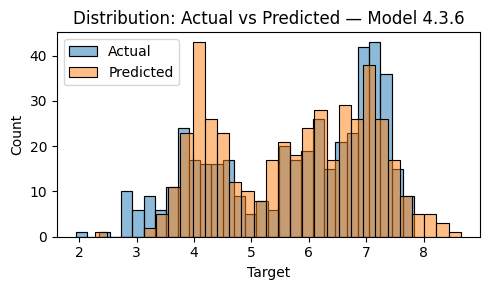

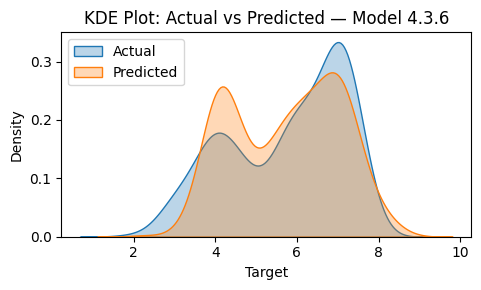

In [64]:
# ==========================================
# Distribution & KDE plots for Model 4.3.6
# ==========================================

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.6")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.6")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.7 Model 7 — Polynomial Linear Regression (Degree = 2, All Features, CV)
- Capturing non-linear relationships with polynomial features


In [65]:
# ============================================================
# Model 4.3.7 — Polynomial Linear Regression (degree = 2, broad features)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Broad feature set (baseline features)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - Polynomial only on numeric features
#    - Scaling AFTER polynomial expansion
# ------------------------------------------------------------
num_poly = Pipeline(
    steps=[
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler())
    ]
)

cat_ohe = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_poly, num_cols),
        ("cat", cat_ohe, cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) Pipeline
# ------------------------------------------------------------
pipe_poly = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("linreg", LinearRegression())
    ]
)

# ------------------------------------------------------------
# 6) Cross-validation (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_poly, X_train, y_train, cv=cv, scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_poly.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_poly.predict(X_train)
y_test_pred  = pipe_poly.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Feature count diagnostics
# ------------------------------------------------------------
pre_fitted = pipe_poly.named_steps["pre"]

n_num_after = (
    pre_fitted
    .named_transformers_["num"]
    .named_steps["poly"]
    .n_output_features_
)

n_cat_after = len(
    pre_fitted
    .named_transformers_["cat"]
    .get_feature_names_out(cat_cols)
)

n_total = n_num_after + n_cat_after

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 4.3.7 — Polynomial Linear Regression (degree = 2)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print("\nFeature counts:")
print(f"  Numeric before:            {len(num_cols)}")
print(f"  Categorical before:        {len(cat_cols)}")
print(f"  Numeric after poly(deg=2): {n_num_after}")
print(f"  Categorical after OHE:     {n_cat_after}")
print(f"  TOTAL after preprocessing: {n_total}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 7 — Polynomial LR (deg=2, broad features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=n_total,
    notes="PolynomialFeatures(deg=2) applied to numeric variables only"
)


📊 Model 4.3.7 — Polynomial Linear Regression (degree = 2)
R² (train): 0.960
R² (test) : 0.956
R² (CV mean): 0.919
MSE (train): 0.09
MSE (test) : 0.09

Feature counts:
  Numeric before:            11
  Categorical before:        9
  Numeric after poly(deg=2): 77
  Categorical after OHE:     16
  TOTAL after preprocessing: 93


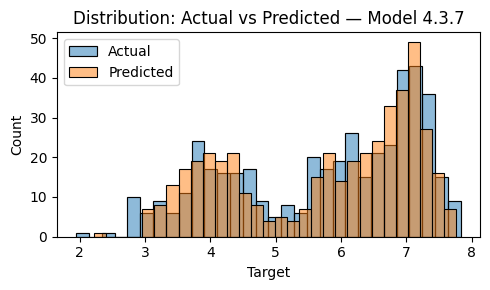

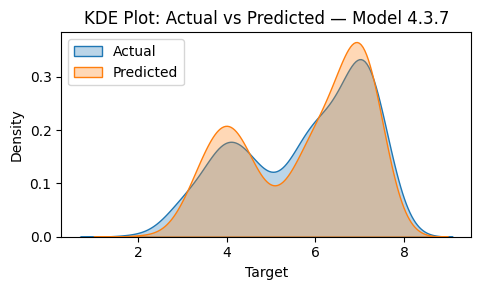

In [66]:
# ==========================================
# Diagnostic plots — Model 4.3.7
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram: Actual vs Predicted
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.7")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# KDE plot: Actual vs Predicted
plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.7")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.8 Model 8 — Polynomial Ridge Regression (Degree = 2, CV)
- Regularized polynomial regression

In [67]:
# ============================================================
# Model 4.3.8 — Polynomial Ridge Regression (degree = 2, broad features)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Broad feature set (same as baseline / Model 4.3.7)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - Polynomial expansion ONLY on numeric features
#    - Scaling AFTER polynomial expansion
# ------------------------------------------------------------
num_poly = Pipeline(
    steps=[
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
    ]
)

cat_ohe = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_poly, num_cols),
        ("cat", cat_ohe, cat_cols),
    ]
)

# ------------------------------------------------------------
# 5) RidgeCV configuration
# ------------------------------------------------------------
alphas = np.logspace(-2, 2, 50)
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = RidgeCV(
    alphas=alphas,
    cv=cv5,
    scoring="r2"
)

# ------------------------------------------------------------
# 6) Pipeline: preprocessing + RidgeCV
# ------------------------------------------------------------
pipe_ridge_poly = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("ridge", ridge),
    ]
)

# ------------------------------------------------------------
# 7) Cross-validated R² (train only)
# ------------------------------------------------------------
r2_cv_mean = cross_val_score(
    pipe_ridge_poly,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 8) Fit model
# ------------------------------------------------------------
pipe_ridge_poly.fit(X_train, y_train)

# ------------------------------------------------------------
# 9) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_ridge_poly.predict(X_train)
y_test_pred  = pipe_ridge_poly.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 10) Feature count diagnostics
# ------------------------------------------------------------
pre_fitted = pipe_ridge_poly.named_steps["pre"]

n_num_after = (
    pre_fitted
    .named_transformers_["num"]
    .named_steps["poly"]
    .n_output_features_
)

n_cat_after = len(
    pre_fitted
    .named_transformers_["cat"]
    .get_feature_names_out(cat_cols)
)

n_total = n_num_after + n_cat_after

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.8 — Polynomial Ridge Regression (degree = 2)")
print(f"Best α: {pipe_ridge_poly.named_steps['ridge'].alpha_:.4f}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print("\nFeature counts:")
print(f"  Numeric before:            {len(num_cols)}")
print(f"  Categorical before:        {len(cat_cols)}")
print(f"  Numeric after poly(deg=2): {n_num_after}")
print(f"  Categorical after OHE:     {n_cat_after}")
print(f"  TOTAL after preprocessing: {n_total}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 8 — Polynomial Ridge (deg=2, broad features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=n_total,
    notes="PolynomialFeatures(deg=2) on numeric vars + RidgeCV"
)


📊 Model 4.3.8 — Polynomial Ridge Regression (degree = 2)
Best α: 5.9636
R² (train): 0.956
R² (test) : 0.957
R² (CV mean): 0.928
MSE (train): 0.10
MSE (test) : 0.09

Feature counts:
  Numeric before:            11
  Categorical before:        9
  Numeric after poly(deg=2): 77
  Categorical after OHE:     16
  TOTAL after preprocessing: 93


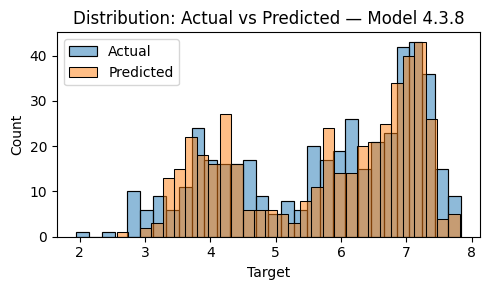

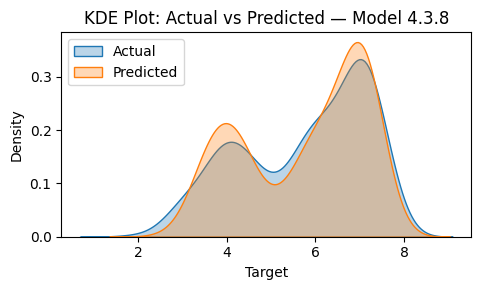

In [68]:
# ==========================================
# Diagnostic plots — Model 4.3.8
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.8")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# KDE
plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.8")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.9 Model 9 — Polynomial LassoCV (Degree = 2)
- Feature selection in polynomial feature space

In [69]:
# ============================================================
# Model 4.3.9 — Polynomial LassoCV (degree = 2, broad features)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Broad feature set (baseline features)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - Polynomial expansion ONLY on numeric features
#    - Scaling AFTER polynomial expansion
# ------------------------------------------------------------
num_poly = Pipeline(
    steps=[
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
    ]
)

cat_ohe = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_poly, num_cols),
        ("cat", cat_ohe, cat_cols),
    ]
)

# ------------------------------------------------------------
# 5) LassoCV configuration
# ------------------------------------------------------------
alphas = np.logspace(-4, 1, 40)
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_cv = LassoCV(
    alphas=alphas,
    cv=cv5,
    max_iter=100000,
    random_state=42
)

# ------------------------------------------------------------
# 6) Pipeline: preprocessing + LassoCV
# ------------------------------------------------------------
pipe_lasso_poly = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lasso", lasso_cv),
    ]
)

# ------------------------------------------------------------
# 7) Cross-validated R² (train only)
# ------------------------------------------------------------
r2_cv_mean = cross_val_score(
    pipe_lasso_poly,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 8) Fit model
# ------------------------------------------------------------
pipe_lasso_poly.fit(X_train, y_train)

# ------------------------------------------------------------
# 9) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lasso_poly.predict(X_train)
y_test_pred  = pipe_lasso_poly.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 10) Coefficients & selected features
# ------------------------------------------------------------
feature_names = pipe_lasso_poly.named_steps["pre"].get_feature_names_out()
coefs = pipe_lasso_poly.named_steps["lasso"].coef_

non_zero_mask = np.abs(coefs) > 1e-8
selected_count = int(non_zero_mask.sum())

selected_features = [
    (name, coef)
    for name, coef in zip(feature_names, coefs)
    if abs(coef) > 1e-8
]

selected_sorted = sorted(
    selected_features,
    key=lambda x: abs(x[1]),
    reverse=True
)

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.9 — Polynomial LassoCV (degree = 2)")
print(f"Best α: {pipe_lasso_poly.named_steps['lasso'].alpha_:.6f}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nTotal features after preprocessing: {len(feature_names)}")
print(f"Selected (non-zero) features: {selected_count} / {len(feature_names)}")

print("\nTop non-zero coefficients (by |coef|):")
for name, coef in selected_sorted[:20]:
    print(f"{name:55s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 9 — Polynomial LassoCV (deg=2, broad features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=selected_count,
    notes="PolynomialFeatures(deg=2) on numeric vars + LassoCV"
)


📊 Model 4.3.9 — Polynomial LassoCV (degree = 2)
Best α: 0.004642
R² (train): 0.952
R² (test) : 0.952
R² (CV mean): 0.939
MSE (train): 0.11
MSE (test) : 0.10

Total features after preprocessing: 93
Selected (non-zero) features: 36 / 93

Top non-zero coefficients (by |coef|):
num__NumCatalogPurchases                                 coef = +1.2277
num__NumWebPurchases                                     coef = +0.9796
num__Income_log NumStorePurchases                        coef = +0.8819
num__NumCatalogPurchases NumStorePurchases               coef = -0.4276
num__NumCatalogPurchases^2                               coef = -0.4204
num__NumWebPurchases NumStorePurchases                   coef = -0.3840
num__NumWebPurchases^2                                   coef = -0.3571
num__NumWebPurchases NumCatalogPurchases                 coef = -0.2621
num__NumWebVisitsMonth^2                                 coef = +0.2547
num__Income_log                                          coef = +0.2373
num__

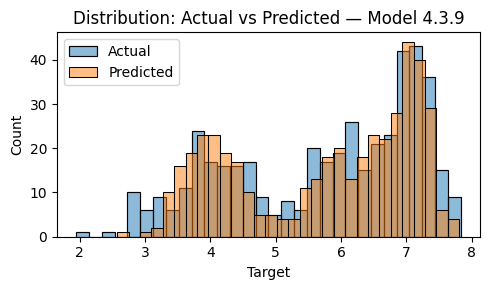

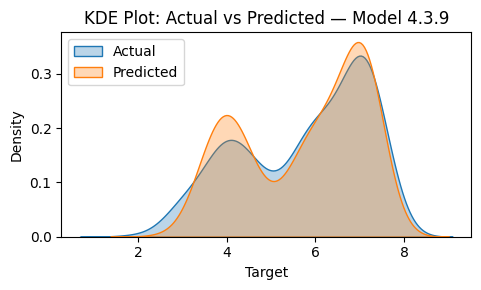

In [70]:
# ==========================================
# Diagnostic plots — Model 4.3.9
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.9")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# KDE
plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.9")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### Model 4.3.10 — Polynomial Lasso (degree = 2, fixed α)

In [71]:
# ============================================================
# Model 4.3.10 — Polynomial Lasso (degree = 2, fixed alpha)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Broad feature set (baseline features)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
# ------------------------------------------------------------
num_poly = Pipeline(
    steps=[
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
    ]
)

cat_ohe = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_poly, num_cols),
        ("cat", cat_ohe, cat_cols),
    ]
)

# ------------------------------------------------------------
# 5) Fixed-alpha Lasso
# ------------------------------------------------------------
alpha_fixed = 0.016   # ≈ نزدیک Best alpha از LassoCV

lasso_fixed = Lasso(
    alpha=alpha_fixed,
    max_iter=100_000,
    random_state=42
)

pipe_lasso_poly_fixed = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lasso", lasso_fixed),
    ]
)

# ------------------------------------------------------------
# 6) Fit model
# ------------------------------------------------------------
pipe_lasso_poly_fixed.fit(X_train, y_train)

# ------------------------------------------------------------
# 7) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lasso_poly_fixed.predict(X_train)
y_test_pred  = pipe_lasso_poly_fixed.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 8) Cross-validated R² (train only, for comparison)
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_lasso_poly_fixed,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 9) Coefficients & selected features
# ------------------------------------------------------------
feature_names = pipe_lasso_poly_fixed.named_steps["pre"].get_feature_names_out()
coefs = pipe_lasso_poly_fixed.named_steps["lasso"].coef_

non_zero_mask = np.abs(coefs) > 1e-8
selected_count = int(non_zero_mask.sum())

selected_features = [
    (name, coef)
    for name, coef in zip(feature_names, coefs)
    if abs(coef) > 1e-8
]

selected_sorted = sorted(
    selected_features,
    key=lambda x: abs(x[1]),
    reverse=True
)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print(f"🍀 Model 4.3.10 — Polynomial Lasso (deg=2, α = {alpha_fixed})")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nSelected (non-zero) features: {selected_count} / {len(feature_names)}")
print("\nTop selected features (by |coef|):")
for name, coef in selected_sorted[:25]:
    print(f"{name:60s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 10 — Polynomial Lasso (deg=2, fixed α)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=selected_count
)


🍀 Model 4.3.10 — Polynomial Lasso (deg=2, α = 0.016)
R² (train): 0.929
R² (test) : 0.931
R² (CV mean): 0.923
MSE (train): 0.16
MSE (test) : 0.14

Selected (non-zero) features: 25 / 93

Top selected features (by |coef|):
num__NumCatalogPurchases                                      coef = +0.9450
num__NumWebPurchases                                          coef = +0.6979
num__Income_log NumStorePurchases                             coef = +0.3440
num__Income_log^2                                             coef = +0.3168
num__NumCatalogPurchases^2                                    coef = -0.3062
num__Income_log Kidhome                                       coef = -0.2765
num__NumCatalogPurchases NumStorePurchases                    coef = -0.2264
num__NumWebPurchases^2                                        coef = -0.2179
num__NumWebPurchases NumStorePurchases                        coef = -0.1987
num__NumStorePurchases                                        coef = +0.1760
num__NumWe

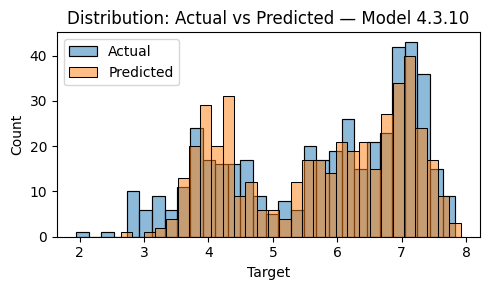

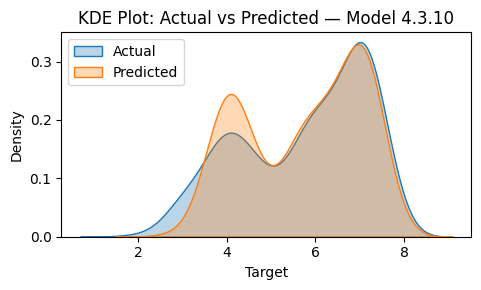

In [72]:
# ==========================================
# Diagnostic plots — Model 4.3.10
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.10")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.10")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


##### 4.3.10.1 Top 25 Lasso coefficients — Model 4.3.10

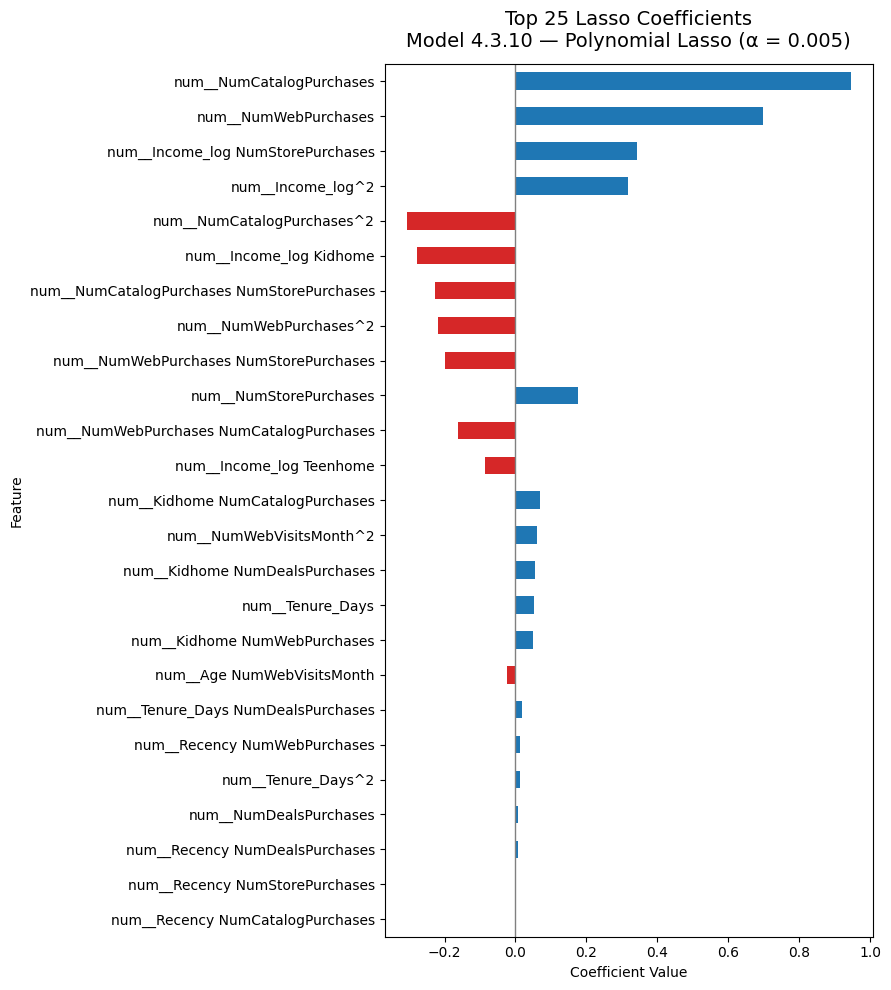

In [73]:
# ===============================
# 📊 Lasso Coefficient Bar Plot (Top 25 features)
# Model 4.3.10 — Polynomial Lasso (fixed α)
# ===============================

import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------
# 1) Take TOP 25 features by absolute coefficient
# ------------------------------------------------
top_k = 25
top_features = selected_sorted[:top_k]   # already sorted by |coef| desc

names = [n for n, c in top_features]
coefs = [c for n, c in top_features]

coef_series = pd.Series(coefs, index=names)

# ------------------------------------------------
# 2) Sort for horizontal bar plot (small → large)
# ------------------------------------------------
coef_series = coef_series.reindex(
    coef_series.abs().sort_values(ascending=True).index
)

# ------------------------------------------------
# 3) Colors by sign
# ------------------------------------------------
colors = ["#1f77b4" if c > 0 else "#d62728" for c in coef_series]

# ------------------------------------------------
# 4) Plot
# ------------------------------------------------
plt.figure(figsize=(9, 10))
coef_series.plot(kind="barh", color=colors)

plt.axvline(0, color="gray", linewidth=1)
plt.title(
    "Top 25 Lasso Coefficients\nModel 4.3.10 — Polynomial Lasso (α = 0.005)",
    fontsize=14,
    pad=12
)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


#### 4.3.11 Model 11 — Linear Regression (on Polynomial Lasso–selected features)
- Linear regression using selected polynomial terms


In [74]:
# ============================================================
# Model 4.3.11 — Linear Regression
# (Polynomial feature space, selected by Lasso)
# ============================================================

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"
y = df[target].copy()

# ------------------------------------------------------------
# 2) Transform X into polynomial feature space
#    (same preprocessor used in Model 4.3.10)
# ------------------------------------------------------------
X_raw = df[num_cols + cat_cols].copy()
X_poly = pipe_lasso_poly_fixed.named_steps["pre"].transform(X_raw)

feature_names_poly = (
    pipe_lasso_poly_fixed
    .named_steps["pre"]
    .get_feature_names_out()
)

# ------------------------------------------------------------
# 3) Select polynomial features kept by Lasso
# ------------------------------------------------------------
coefs = pipe_lasso_poly_fixed.named_steps["lasso"].coef_

selected_indices = [
    i for i, c in enumerate(coefs) if abs(c) > 1e-8
]

X_poly_selected = X_poly[:, selected_indices]
selected_feature_names = feature_names_poly[selected_indices]
feature_count = len(selected_indices)

# ------------------------------------------------------------
# 4) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_poly_selected,
    y,
    test_size=0.20,
    random_state=42
)

# ------------------------------------------------------------
# 5) Linear Regression model
# ------------------------------------------------------------
lin_reg = LinearRegression()

# Cross-validated R² (train only)
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    lin_reg,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# Fit model
lin_reg.fit(X_train, y_train)

# ------------------------------------------------------------
# 6) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = lin_reg.predict(X_train)
y_test_pred  = lin_reg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 7) Coefficient table (polynomial space)
# ------------------------------------------------------------
coef_table = sorted(
    zip(selected_feature_names, lin_reg.coef_),
    key=lambda x: abs(x[1]),
    reverse=True
)

# ------------------------------------------------------------
# 8) Report
# ------------------------------------------------------------
print("📊 Model 4.3.11 — Linear Regression (Polynomial, Lasso-selected)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

print("\nTop coefficients (by |coef|):")
for name, coef in coef_table[:20]:
    print(f"{name:60s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 9) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 11 — Linear Regression (Poly, Lasso-selected)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count
)


📊 Model 4.3.11 — Linear Regression (Polynomial, Lasso-selected)
R² (train): 0.948
R² (test) : 0.946
R² (CV mean, 5-fold): 0.944
MSE (train): 0.11
MSE (test) : 0.11
Final feature count: 25

Top coefficients (by |coef|):
num__NumCatalogPurchases                                      coef = +1.5586
num__Income_log NumStorePurchases                             coef = +1.5013
num__NumWebPurchases                                          coef = +1.0860
num__NumCatalogPurchases NumStorePurchases                    coef = -0.6561
num__NumStorePurchases                                        coef = -0.5805
num__NumCatalogPurchases^2                                    coef = -0.5553
num__NumWebPurchases NumStorePurchases                        coef = -0.5300
num__NumWebPurchases^2                                        coef = -0.4019
num__NumWebPurchases NumCatalogPurchases                      coef = -0.2658
num__Income_log^2                                             coef = +0.2063
num__Income

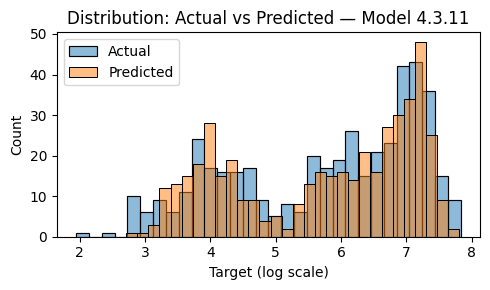

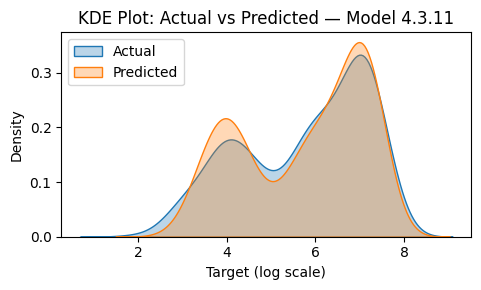

In [75]:
# ==========================================
# Distribution & KDE plots — Model 4.3.11
# ==========================================

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.11")
plt.xlabel("Target (log scale)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.11")
plt.xlabel("Target (log scale)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.12 Model 12 — Decision Tree Regressor (Baseline)
- Non-linear model without preprocessing assumptions

In [76]:
# ============================================================
# Model 4.3.12 — Regression Tree (DecisionTreeRegressor + CV)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature set (same baseline features used earlier)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - One-hot encode categorical features
#    - Keep numeric features unchanged (trees do not need scaling)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Decision Tree model
# ------------------------------------------------------------
tree_model = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

pipe_tree = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("tree", tree_model)
    ]
)

# ------------------------------------------------------------
# 6) Cross-validated R² (train only)
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

r2_cv_mean = cross_val_score(
    pipe_tree,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_tree.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_tree.predict(X_train)
y_test_pred  = pipe_tree.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Tree diagnostics
# ------------------------------------------------------------
tree_estimator = pipe_tree.named_steps["tree"]
tree_depth = tree_estimator.get_depth()
tree_leaves = tree_estimator.get_n_leaves()

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌳 Model 4.3.12 — Regression Tree (DecisionTreeRegressor)")
print(f"Tree depth: {tree_depth}")
print(f"Number of leaves: {tree_leaves}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 12 — Regression Tree",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=tree_leaves
    #feature_count= 20
)


🌳 Model 4.3.12 — Regression Tree (DecisionTreeRegressor)
Tree depth: 24
Number of leaves: 1611
R² (train): 1.000
R² (test) : 0.943
R² (CV mean, 5-fold): 0.924
MSE (train): 0.00
MSE (test) : 0.11


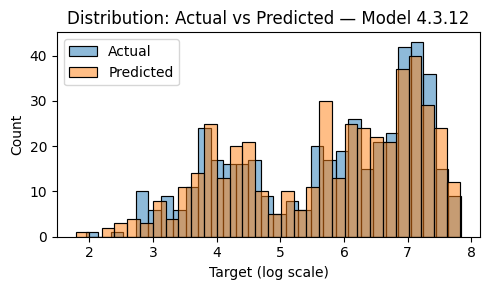

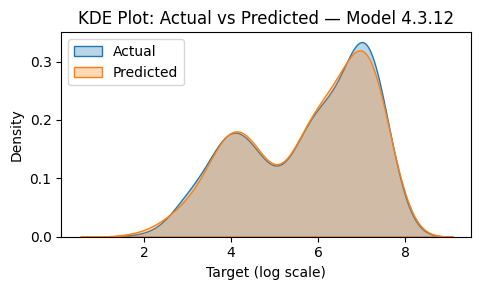

In [77]:
# ==========================================
# Distribution & KDE plots — Model 4.3.12
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.12")
plt.xlabel("Target (log scale)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.12")
plt.xlabel("Target (log scale)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.13 Model 13 — Tuned Decision Tree Regressor (GridSearchCV via CV)

In [78]:
# ============================================================
# Model 4.3.13 — Tuned Regression Tree (GridSearchCV + CV)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature set (updated baseline features)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - One-hot encode categorical features
#    - Keep numeric features unchanged
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Base tree model
# ------------------------------------------------------------
base_tree = DecisionTreeRegressor(random_state=42)

pipe_tree = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("tree", base_tree),
    ]
)

# ------------------------------------------------------------
# 6) Hyperparameter grid
# ------------------------------------------------------------
param_grid = {
    "tree__max_depth": [4, 6, 8, 10, 12],
    "tree__min_samples_leaf": [2, 4, 6, 8],
    "tree__min_samples_split": [2, 5, 10],
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipe_tree,
    param_grid=param_grid,
    cv=cv5,
    scoring="r2",
    n_jobs=-1,
)

# ------------------------------------------------------------
# 7) Fit GridSearch
# ------------------------------------------------------------
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Tree diagnostics
# ------------------------------------------------------------
best_tree = best_model.named_steps["tree"]
tree_depth = best_tree.get_depth()
tree_leaves = best_tree.get_n_leaves()

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌳 Model 4.3.13 — Tuned Regression Tree (GridSearchCV)")
print("Best parameters:", best_params)
print(f"Tree depth: {tree_depth}")
print(f"Number of leaves: {tree_leaves}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {best_cv_score:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 13 — Tuned Regression Tree",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=best_cv_score,
    feature_count=tree_leaves
    #feature_count=20
)


🌳 Model 4.3.13 — Tuned Regression Tree (GridSearchCV)
Best parameters: {'tree__max_depth': 8, 'tree__min_samples_leaf': 6, 'tree__min_samples_split': 2}
Tree depth: 8
Number of leaves: 133
R² (train): 0.968
R² (test) : 0.956
R² (CV mean, 5-fold): 0.943
MSE (train): 0.07
MSE (test) : 0.09


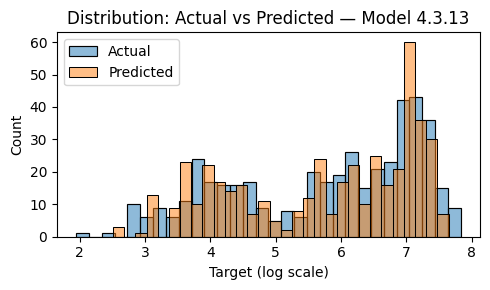

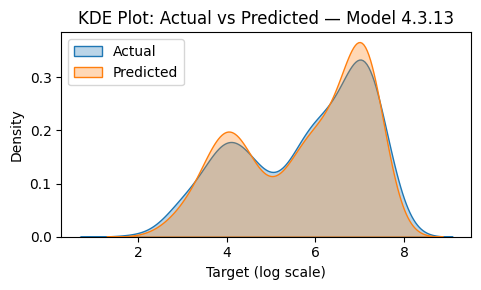

In [79]:
# ==========================================
# Distribution & KDE plots — Model 4.3.13
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.13")
plt.xlabel("Target (log scale)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.13")
plt.xlabel("Target (log scale)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.14 Model 14 — Tuned Decision Tree Regressor (ccp_alpha via CV)
- Complexity pruning using cost-complexity pruning

In [80]:
#if False:
# ============================================================
# 🌳 Model 4.3.14 — Regression Tree (Cost-Complexity Pruning + CV)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature sets (FINAL agreed set)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing (OHE for categorical, numeric passthrough)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Fit unpruned tree to obtain CCP path
# ------------------------------------------------------------
base_tree = DecisionTreeRegressor(random_state=42)

pipe_base = Pipeline([
    ("pre", preprocessor),
    ("tree", base_tree),
])

pipe_base.fit(X_train, y_train)

tree_estimator = pipe_base.named_steps["tree"]

X_train_transformed = pipe_base.named_steps["pre"].transform(X_train)

ccp_path = tree_estimator.cost_complexity_pruning_path(
    X_train_transformed, y_train
)

ccp_alphas = ccp_path.ccp_alphas[:-1]  # drop trivial last alpha

# ------------------------------------------------------------
# 6) Cross-validation to select best ccp_alpha
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []

for alpha in ccp_alphas:
    tree_tmp = DecisionTreeRegressor(
        random_state=42,
        ccp_alpha=alpha
    )
    pipe_tmp = Pipeline([
        ("pre", preprocessor),
        ("tree", tree_tmp),
    ])
    score = cross_val_score(
        pipe_tmp,
        X_train,
        y_train,
        cv=cv5,
        scoring="r2"
    ).mean()
    cv_scores.append(score)

best_alpha = ccp_alphas[np.argmax(cv_scores)]
best_cv_score = np.max(cv_scores)

# ------------------------------------------------------------
# 7) Refit best pruned tree
# ------------------------------------------------------------
final_tree = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=best_alpha
)

pipe_tree_pruned = Pipeline([
    ("pre", preprocessor),
    ("tree", final_tree),
])

pipe_tree_pruned.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_tree_pruned.predict(X_train)
y_test_pred  = pipe_tree_pruned.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Final tree characteristics
# ------------------------------------------------------------
tree_final = pipe_tree_pruned.named_steps["tree"]
tree_depth = tree_final.get_depth()
tree_leaves = tree_final.get_n_leaves()

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌳 Model 4.3.14 — Regression Tree (CCP Pruning + CV)")
print(f"Best ccp_alpha: {best_alpha:.6f}")
print(f"Tree depth: {tree_depth}")
print(f"Leaf nodes: {tree_leaves}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test):  {r2_test:.3f}")
print(f"Best CV R² (5-fold): {best_cv_score:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test):  {mse_test:.2f}")

# ------------------------------------------------------------
# 11) Log result (MODEL NUMBERING INTENTIONAL)
# ------------------------------------------------------------
log_model_result(
    name="Model 14 — Regression Tree (CCP Pruned)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=best_cv_score,
    feature_count=tree_leaves
)


🌳 Model 4.3.14 — Regression Tree (CCP Pruning + CV)
Best ccp_alpha: 0.000416
Tree depth: 10
Leaf nodes: 82
R² (train): 0.975
R² (test):  0.947
Best CV R² (5-fold): 0.930
MSE (train): 0.06
MSE (test):  0.11


#### 4.3.15 Model 15 — Decision Tree Regressor (Fixed Best ccp_alpha + cv)
- Final tree model with selected pruning parameter

In [81]:
# ============================================================
# 🌳 Model 4.3.15 — Regression Tree (fixed ccp_alpha + CV)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature sets (FINAL agreed set)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing (OHE for categorical, numeric passthrough)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Fixed ccp_alpha (from Model 4.3.14)
# ------------------------------------------------------------
ccp_alpha_fixed = 0.000416

tree_fixed = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=ccp_alpha_fixed
)

pipe_tree_fixed = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("tree", tree_fixed),
    ]
)

# ------------------------------------------------------------
# 6) Cross-validated R² on TRAIN (for display)
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

r2_cv_mean = cross_val_score(
    pipe_tree_fixed,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_tree_fixed.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_tree_fixed.predict(X_train)
y_test_pred  = pipe_tree_fixed.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Final tree characteristics
# ------------------------------------------------------------
tree_final = pipe_tree_fixed.named_steps["tree"]
tree_depth = tree_final.get_depth()
tree_leaves = tree_final.get_n_leaves()

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌳 Model 4.3.15 — Regression Tree (fixed ccp_alpha)")
print(f"Fixed ccp_alpha: {ccp_alpha_fixed}")
print(f"Tree depth: {tree_depth}")
print(f"Leaf nodes: {tree_leaves}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test):  {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test):  {mse_test:.2f}")

# ------------------------------------------------------------
# 11) Log result
# ------------------------------------------------------------
log_model_result(
    name="Model 15 — Regression Tree (fixed ccp_alpha)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=tree_leaves,
    notes=f"Fixed ccp_alpha = {ccp_alpha_fixed} (from Model 4.3.14)"
)


🌳 Model 4.3.15 — Regression Tree (fixed ccp_alpha)
Fixed ccp_alpha: 0.000416
Tree depth: 11
Leaf nodes: 84
R² (train): 0.975
R² (test):  0.946
R² (CV mean, 5-fold): 0.930
MSE (train): 0.05
MSE (test):  0.11


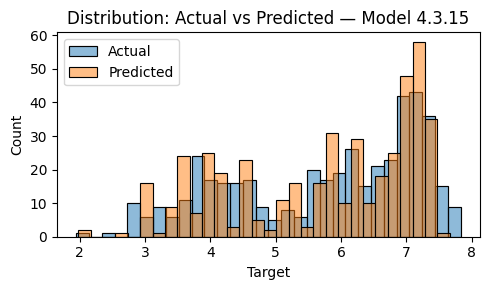

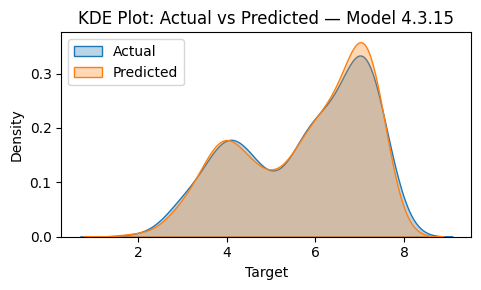

In [82]:
# ==========================================
# Distribution & KDE plots for model: 15
# ==========================================

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.15")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.15")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


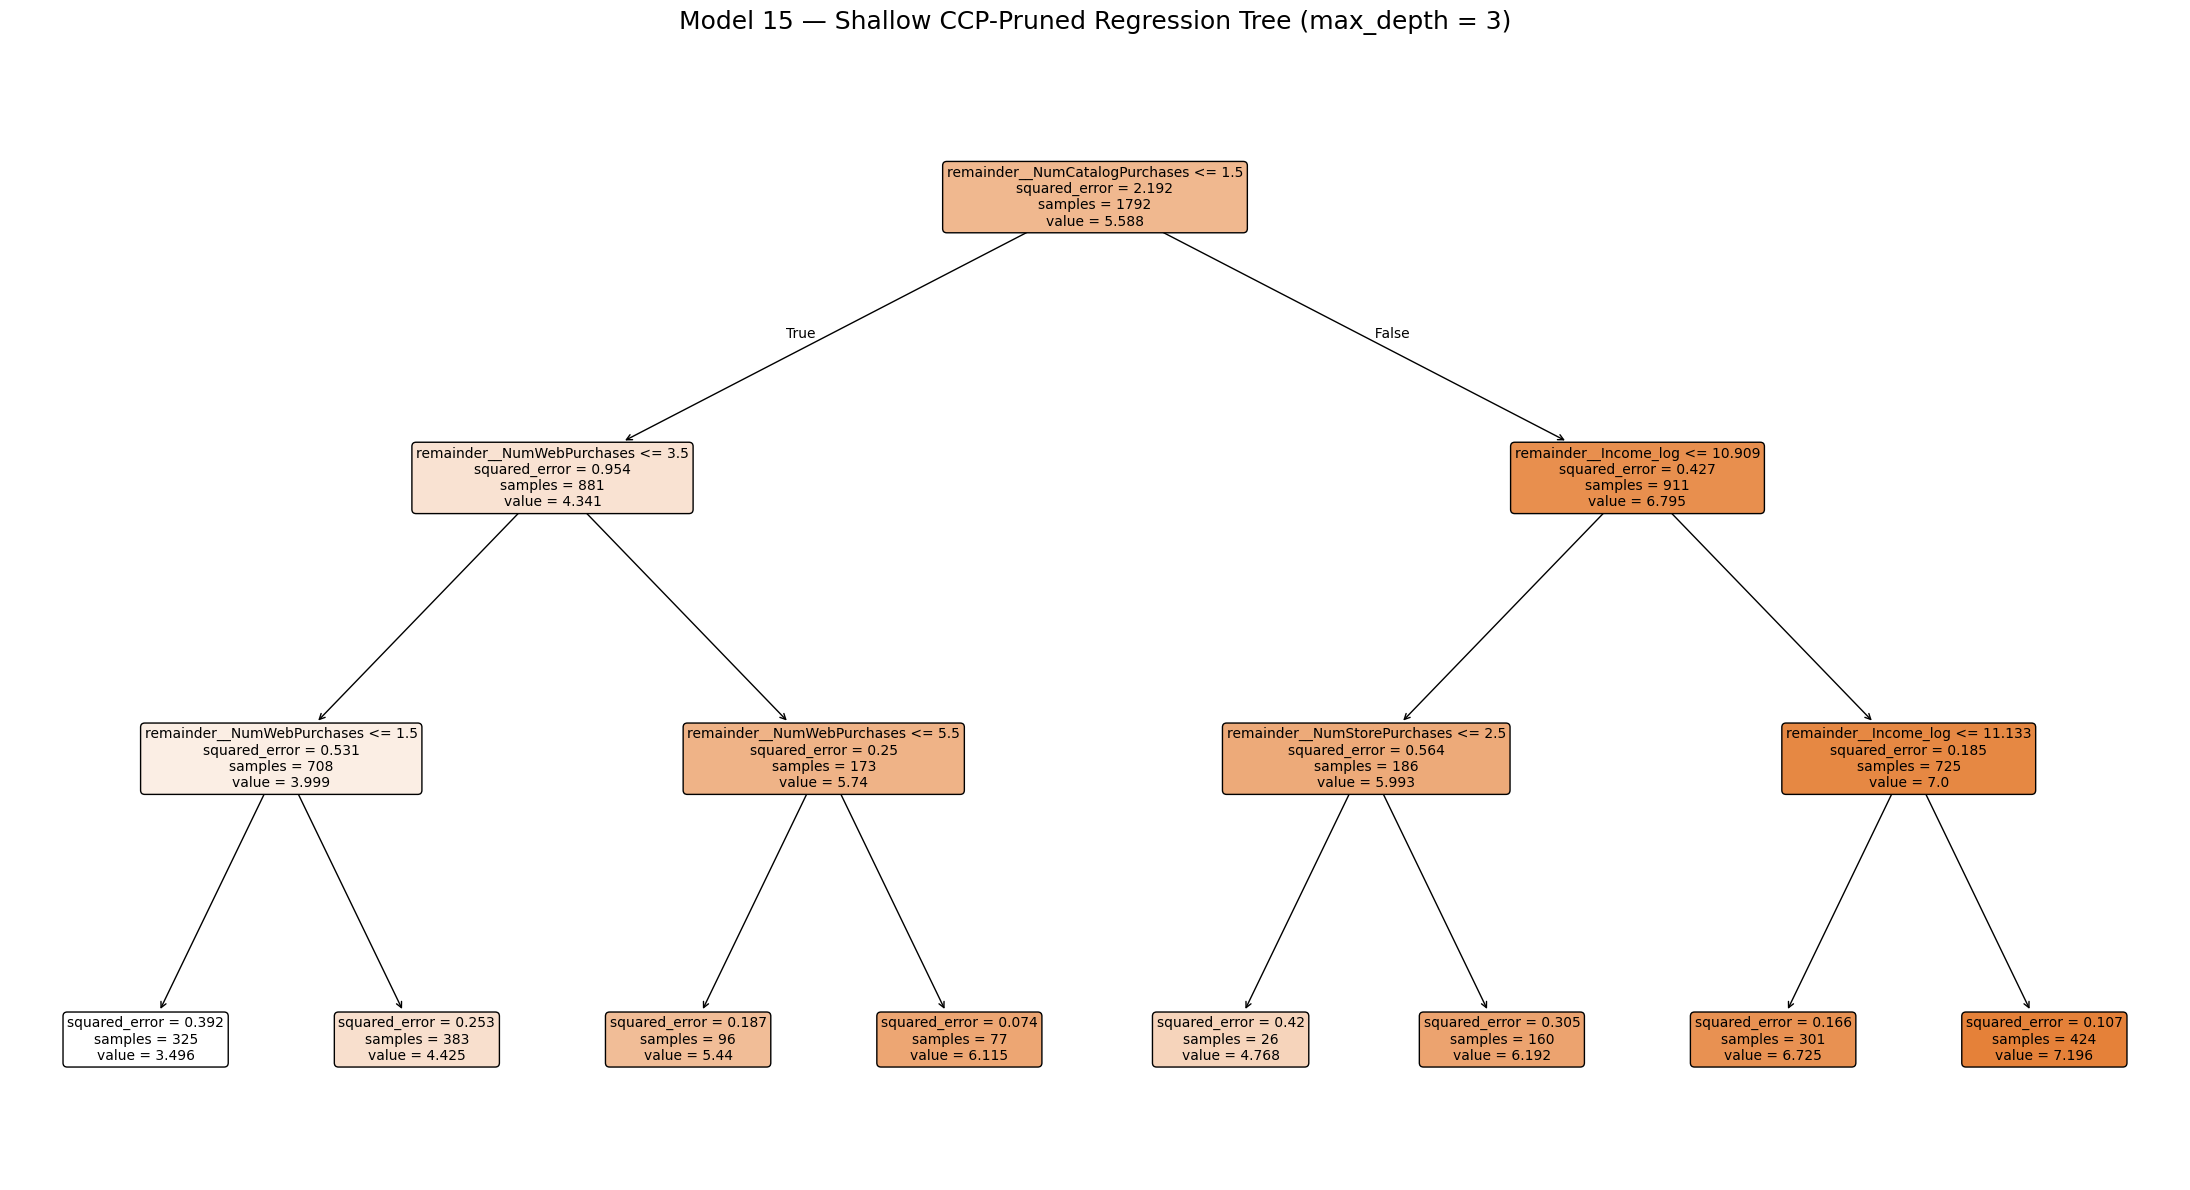

In [83]:
# ============================================================
# Optional — Visualize a shallow version of Model 15 (depth = 3)
# ============================================================

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Get fitted preprocessor and tree from Model 15
# ------------------------------------------------------------
prep = pipe_tree_fixed.named_steps["pre"]
tree_final = pipe_tree_fixed.named_steps["tree"]

# Feature names after preprocessing (numeric + OHE)
feature_names = prep.get_feature_names_out()

# ------------------------------------------------------------
# 2) Build a shallow tree using the SAME ccp_alpha
# ------------------------------------------------------------
shallow_tree = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=tree_final.ccp_alpha,   # same pruning strength
    max_depth=3                       # force interpretability
)

# ------------------------------------------------------------
# 3) Fit shallow tree on transformed training data
# ------------------------------------------------------------
X_train_trans = prep.transform(X_train)
shallow_tree.fit(X_train_trans, y_train)

# ------------------------------------------------------------
# 4) Plot the shallow tree
# ------------------------------------------------------------
plt.figure(figsize=(22, 12))
plot_tree(
    shallow_tree,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title(
    "Model 15 — Shallow CCP-Pruned Regression Tree (max_depth = 3)",
    fontsize=18,
    pad=20
)
plt.tight_layout()
plt.show()


#### 4.3.16 Model 16 — Random Forest Regressor (Baseline, OOB)
- Ensemble model with out-of-bag evaluation

In [84]:
# ============================================================
# 🌲 Model 4.3.16 — Base Random Forest Regressor (200 trees, OOB)
# ============================================================

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Features (same as Models 4.3.13–4.3.15)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

target = "TotalSpend_log"

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 2) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 3) Preprocessing (OHE for categorical only)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 4) Random Forest model
# ------------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    oob_score=True,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

model16 = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", rf),
])

# ------------------------------------------------------------
# 5) Fit
# ------------------------------------------------------------
model16.fit(X_train, y_train)

# ------------------------------------------------------------
# 6) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = model16.predict(X_train)
y_test_pred  = model16.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

oob_r2 = model16.named_steps["rf"].oob_score_

# ------------------------------------------------------------
# 7) Report
# ------------------------------------------------------------
print("🌲 Model 4.3.16 — Base Random Forest (200 trees, OOB)")
print(f"OOB R²:       {oob_r2:.3f}")
print(f"R² (train):   {r2_train:.3f}")
print(f"R² (test):    {r2_test:.3f}")
print(f"MSE (train):  {mse_train:.3f}")
print(f"MSE (test):   {mse_test:.3f}")

# ------------------------------------------------------------
# 8) Log
# ------------------------------------------------------------
log_model_result(
    "Model 16 — Base Random Forest (200 trees, OOB)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=oob_r2,
    feature_count=None
)


🌲 Model 4.3.16 — Base Random Forest (200 trees, OOB)
OOB R²:       0.959
R² (train):   0.994
R² (test):    0.972
MSE (train):  0.012
MSE (test):   0.057


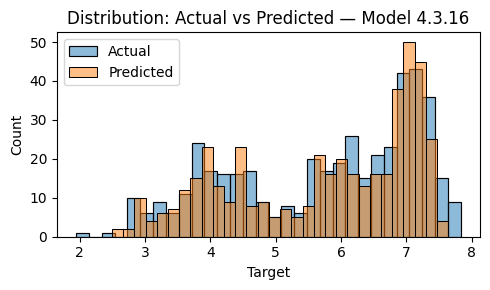

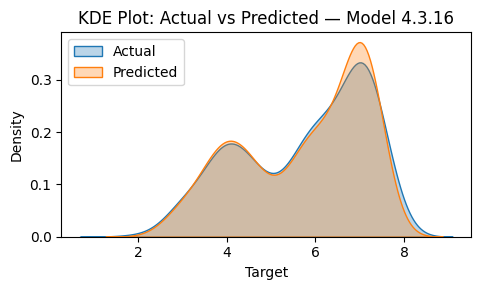

In [85]:
# ==========================================
# Distribution & KDE plots — Model 4.3.16
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.16")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.16")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.17 Model 17 — Tuned Random Forest Regressor (GridSearchCV)
- Hyperparameter tuning for improved generalization

In [86]:
# ============================================================
# 🌲 Model 4.3.17 — Tuned Random Forest Regressor (GridSearchCV)
# ============================================================

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Features (same as Models 4.3.13–4.3.16)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

target = "TotalSpend_log"

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 2) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 3) Preprocessing (OHE for categorical only)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 4) Base Random Forest (200 trees)
# ------------------------------------------------------------
base_forest = RandomForestRegressor(
    n_estimators=200,
    oob_score=True,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

pipe_forest = Pipeline([
    ("preprocessor", preprocessor),
    ("forest", base_forest),
])

# ------------------------------------------------------------
# 5) Hyperparameter grid
# ------------------------------------------------------------
param_grid = {
    "forest__max_depth": [None, 10, 15, 20],
    "forest__min_samples_split": [2, 5, 10],
    "forest__min_samples_leaf": [1, 2, 4],
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipe_forest,
    param_grid=param_grid,
    cv=cv5,
    scoring="r2",
    n_jobs=-1
)

# ------------------------------------------------------------
# 6) Fit GridSearchCV
# ------------------------------------------------------------
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_r2 = grid_search.best_score_

# ------------------------------------------------------------
# 7) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 8) Forest diagnostics
# ------------------------------------------------------------
forest = best_model.named_steps["forest"]

oob_r2 = forest.oob_score_

tree_depths = [est.tree_.max_depth for est in forest.estimators_]
mean_depth = float(np.mean(tree_depths))

leaf_counts = [(est.tree_.children_left == -1).sum() for est in forest.estimators_]
mean_leaves = float(np.mean(leaf_counts))

# ------------------------------------------------------------
# 9) Report
# ------------------------------------------------------------
print("🌲 Model 4.3.17 — Tuned Random Forest (GridSearchCV)")
print(f"Best params:                 {best_params}")
print(f"OOB R²:                      {oob_r2:.3f}")
print(f"R² (train):                  {r2_train:.3f}")
print(f"R² (test):                   {r2_test:.3f}")
print(f"Best CV R² (5-fold):         {best_cv_r2:.3f}")
print(f"MSE (train):                 {mse_train:.3f}")
print(f"MSE (test):                  {mse_test:.3f}")
print(f"Mean tree depth:             {mean_depth:.1f}")
print(f"Mean leaf nodes per tree:    {mean_leaves:.1f}")

# ------------------------------------------------------------
# 10) Log
# ------------------------------------------------------------
log_model_result(
    "Model 17 — Tuned Random Forest (GridSearchCV)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=best_cv_r2,
    feature_count=None
)


🌲 Model 4.3.17 — Tuned Random Forest (GridSearchCV)
Best params:                 {'forest__max_depth': 20, 'forest__min_samples_leaf': 1, 'forest__min_samples_split': 2}
OOB R²:                      0.958
R² (train):                  0.994
R² (test):                   0.972
Best CV R² (5-fold):         0.959
MSE (train):                 0.012
MSE (test):                  0.057
Mean tree depth:             20.0
Mean leaf nodes per tree:    1047.1


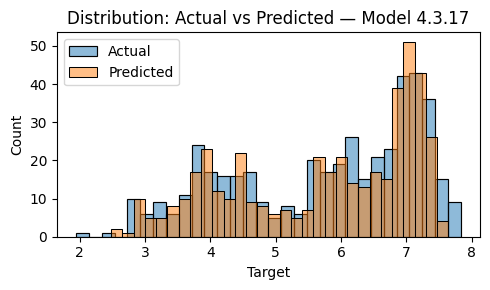

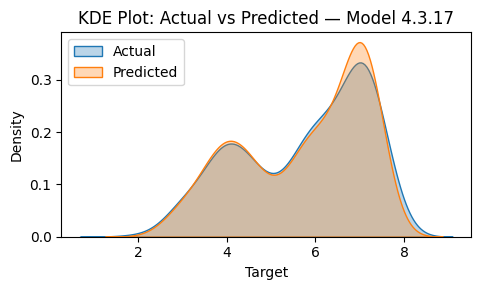

In [87]:
# ==========================================
# Distribution & KDE plots — Model 4.3.17
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.17")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.17")
plt.xlabel("Target")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [88]:
# ============================================================
# 🌲 Feature Importance (Random Forest)
# Based on Model 4.3.17 best estimator
# ============================================================

import pandas as pd
import numpy as np

# ------------------------------------------------------------
# 1) Get fitted preprocessor & forest from Model 4.3.17
# ------------------------------------------------------------
preprocessor = best_model.named_steps["preprocessor"]
forest = best_model.named_steps["forest"]

# ------------------------------------------------------------
# 2) Get feature names after preprocessing
# ------------------------------------------------------------
feature_names = preprocessor.get_feature_names_out()

# ------------------------------------------------------------
# 3) Extract feature importances
# ------------------------------------------------------------
importances = forest.feature_importances_

feat_imp = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

# ------------------------------------------------------------
# 4) Normalize (optional but useful for interpretation)
# ------------------------------------------------------------
feat_imp["importance_norm"] = feat_imp["importance"] / feat_imp["importance"].sum()

# ------------------------------------------------------------
# 5) Report
# ------------------------------------------------------------
print("🌲 Random Forest Feature Importance")
print(f"Total features: {len(feat_imp)}\n")

print("Top 20 most important features:\n")
display(feat_imp.head(20))

#feat_imp.head(20)


🌲 Random Forest Feature Importance
Total features: 27

Top 20 most important features:



,feature,importance,importance_norm
0,remainder__NumCatalogPurchases,0.704137,0.704137
1,remainder__NumWebPurchases,0.152736,0.152736
2,remainder__Income_log,0.058988,0.058988
3,remainder__NumStorePurchases,0.049492,0.049492
4,remainder__Tenure_Days,0.007833,0.007833
5,remainder__NumWebVisitsMonth,0.005919,0.005919
6,remainder__Recency,0.003770,0.003770
7,cat__AcceptedCmp4_1,0.003736,0.003736
8,remainder__Age,0.003265,0.003265
9,remainder__NumDealsPurchases,0.002211,0.002211


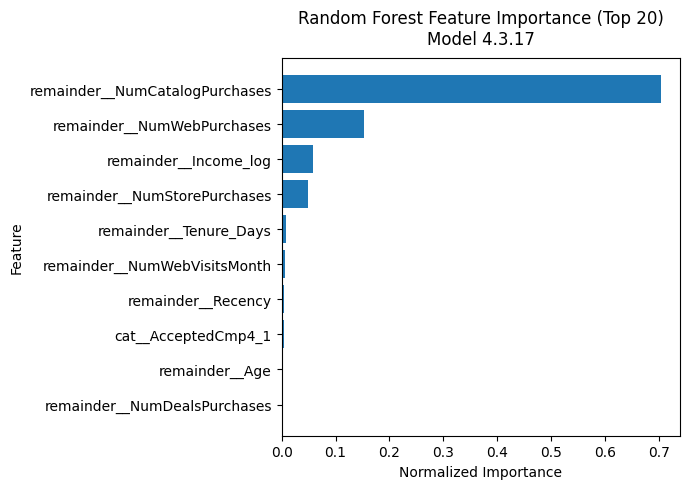

In [89]:
# ==========================================
# Feature Importance Bar Plot — Top 10
# ==========================================

import matplotlib.pyplot as plt

TOP_K = 10

top_feat = feat_imp.head(TOP_K).iloc[::-1]  # reverse for horizontal plot

plt.figure(figsize=(7, 5))
plt.barh(top_feat["feature"], top_feat["importance_norm"])
plt.title("Random Forest Feature Importance (Top 20)\nModel 4.3.17", pad=10)
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### 4.3.18 Model 18 — Support Vector Regression (RBF Kernel)
- Applied on reduced feature set or sampled data

In [90]:
# ===============================
# 🌊 Model 4.3.18 — SVR (RBF) on reduced sample
#           with 8 Lasso-selected features
# ===============================
#
# NOTE:
# - To keep SVR (RBF) computationally reasonable, we:
#   1) Use only 8 features selected by Lasso (Model 5).
#   2) Train on a random subset of ~250 samples instead of the full dataset.
# - Target is still TotalSpend_log to stay consistent with previous models.
# 
import numpy as np
import pandas as pd

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Lasso-selected features (from Model 4.3.5 / 4.3.6)
# ------------------------------------------------------------
numeric_features_18 = [
    "NumCatalogPurchases",
    "Income_log",
    "NumWebPurchases",
    "NumStorePurchases",
    "Kidhome",
    "NumDealsPurchases",
    "Teenhome",
    "Tenure_Days",
]

# ------------------------------------------------------------
# 3) Data
# ------------------------------------------------------------
X = df[numeric_features_18].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 4) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 5) Preprocessing
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_18),
    ]
)

# ------------------------------------------------------------
# 6) SVR pipeline
# ------------------------------------------------------------
pipe_svr_18 = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("svr", SVR(kernel="rbf")),
    ]
)

# ------------------------------------------------------------
# 7) GridSearchCV
# ------------------------------------------------------------
param_grid_18 = {
    "svr__C": [0.1, 1, 10],
    "svr__gamma": ["scale", 0.1, 0.01],
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

grid_18 = GridSearchCV(
    estimator=pipe_svr_18,
    param_grid=param_grid_18,
    cv=cv5,
    scoring="r2",
    n_jobs=-1,
)

# ------------------------------------------------------------
# 8) Fit
# ------------------------------------------------------------
grid_18.fit(X_train, y_train)

best_model_18 = grid_18.best_estimator_
best_params_18 = grid_18.best_params_
best_cv_r2_18 = grid_18.best_score_

# ------------------------------------------------------------
# 9) Predictions & metrics
# ------------------------------------------------------------
y_train_pred_18 = best_model_18.predict(X_train)
y_test_pred_18  = best_model_18.predict(X_test)

r2_train_18 = r2_score(y_train, y_train_pred_18)
r2_test_18  = r2_score(y_test,  y_test_pred_18)

mse_train_18 = mean_squared_error(y_train, y_train_pred_18)
mse_test_18  = mean_squared_error(y_test,  y_test_pred_18)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌊 Model 4.3.18 — SVR (RBF, Lasso-selected features)")
print(f"Best params: {best_params_18}")
print(f"R² (train): {r2_train_18:.3f}")
print(f"R² (test) : {r2_test_18:.3f}")
print(f"R² (CV mean, 5-fold): {best_cv_r2_18:.3f}")
print(f"MSE (train): {mse_train_18:.3f}")
print(f"MSE (test) : {mse_test_18:.3f}")
print(f"Feature count: {len(numeric_features_18)}")

# ------------------------------------------------------------
# 11) Log
# ------------------------------------------------------------
log_model_result(
    name="Model 18 — SVR (RBF, Lasso-selected features)",
    r2_train=r2_train_18,
    r2_test=r2_test_18,
    mse_train=mse_train_18,
    mse_test=mse_test_18,
    r2_cv=best_cv_r2_18,
    feature_count=len(numeric_features_18),
)


🌊 Model 4.3.18 — SVR (RBF, Lasso-selected features)
Best params: {'svr__C': 10, 'svr__gamma': 0.1}
R² (train): 0.972
R² (test) : 0.963
R² (CV mean, 5-fold): 0.947
MSE (train): 0.062
MSE (test) : 0.074
Feature count: 8


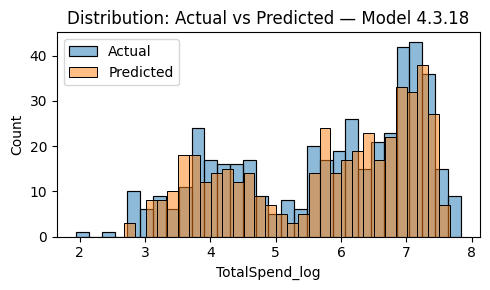

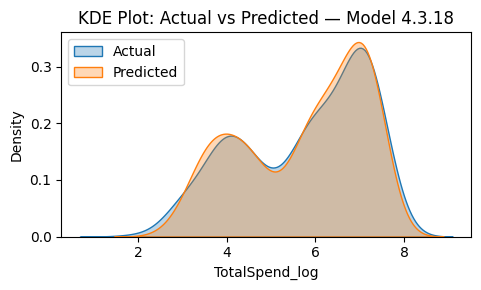

In [91]:
# ===============================
# 📊 Plots — Model 4.3.18
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred_18, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.18")
plt.xlabel("TotalSpend_log")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# KDE plot
plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred_18, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.18")
plt.xlabel("TotalSpend_log")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.19 Model 19 — Gradient Boosting Regressor (Baseline)

In [92]:
# ============================================================
# 🌱 Model 4.3.19 — Gradient Boosting Regressor (Baseline)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature set (same baseline features as previous tree models)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing (OHE for categorical, numeric passthrough)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Gradient Boosting Regressor (baseline parameters)
# ------------------------------------------------------------
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=1.0,
    random_state=42
)

pipe_gbr = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("gbr", gbr)
    ]
)

# ------------------------------------------------------------
# 6) Cross-validated R² on TRAIN (leak-free)
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

r2_cv_mean = cross_val_score(
    pipe_gbr,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_gbr.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_gbr.predict(X_train)
y_test_pred  = pipe_gbr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Report
# ------------------------------------------------------------
print("🌱 Model 4.3.19 — Gradient Boosting Regressor (Baseline)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

# ------------------------------------------------------------
# 10) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 19 — Gradient Boosting (baseline)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=None,
    notes="Baseline Gradient Boosting, no hyperparameter tuning"
)


🌱 Model 4.3.19 — Gradient Boosting Regressor (Baseline)
R² (train): 0.978
R² (test) : 0.967
R² (CV mean, 5-fold): 0.959
MSE (train): 0.05
MSE (test) : 0.07


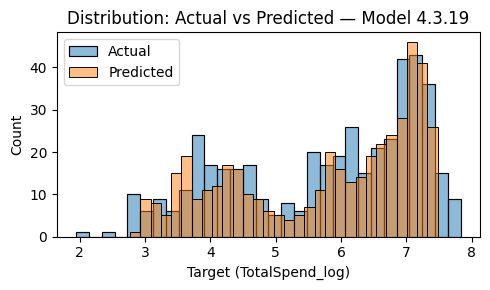

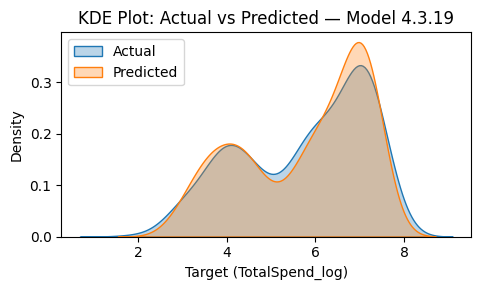

In [93]:
# ==========================================
# 📊 Plots — Model 4.3.19
# ==========================================

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.19")
plt.xlabel("Target (TotalSpend_log)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.19")
plt.xlabel("Target (TotalSpend_log)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.20 Model 20 —  XGBoost Regressor (Tuned, CV)

In [94]:
# ===============================
# 🚀 Model 20 — XGBoost Regressor (Tuned, CV)
# ===============================

import numpy as np
import pandas as pd

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature set (FINAL, CONFIRMED)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - OHE for categorical
#    - Numeric passthrough (tree-based)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Base XGBoost regressor
# ------------------------------------------------------------
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

pipe_xgb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("xgb", xgb_base)
    ]
)

# ------------------------------------------------------------
# 6) Hyperparameter grid (controlled & reasonable)
# ------------------------------------------------------------
param_grid = {
    "xgb__n_estimators": [200, 400],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.05, 0.1],
    "xgb__subsample": [0.8, 1.0],
    "xgb__colsample_bytree": [0.8, 1.0]
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid,
    cv=cv5,
    scoring="r2",
    n_jobs=-1
)

# ------------------------------------------------------------
# 7) Fit GridSearchCV
# ------------------------------------------------------------
grid_xgb.fit(X_train, y_train)

best_model_20 = grid_xgb.best_estimator_
best_params_20 = grid_xgb.best_params_
best_cv_20 = grid_xgb.best_score_

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = best_model_20.predict(X_train)
y_test_pred  = best_model_20.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Report
# ------------------------------------------------------------
print("🚀 Model 20 — XGBoost Regressor (Tuned)")
print("Best parameters:")
for k, v in best_params_20.items():
    print(f"  {k}: {v}")

print(f"\nR² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {best_cv_20:.3f}")
print(f"MSE (train): {mse_train:.3f}")
print(f"MSE (test) : {mse_test:.3f}")

# ------------------------------------------------------------
# 10) Log result
# ------------------------------------------------------------
log_model_result(
    name="Model 20 — XGBoost Regressor (Tuned)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=best_cv_20,
    feature_count=None,
    notes="Same feature set as final linear / tree / RF models"
)


🚀 Model 20 — XGBoost Regressor (Tuned)
Best parameters:
  xgb__colsample_bytree: 1.0
  xgb__learning_rate: 0.05
  xgb__max_depth: 5
  xgb__n_estimators: 400
  xgb__subsample: 0.8

R² (train): 0.996
R² (test) : 0.974
R² (CV mean, 5-fold): 0.965
MSE (train): 0.008
MSE (test) : 0.053


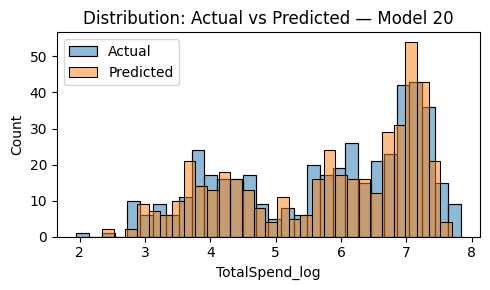

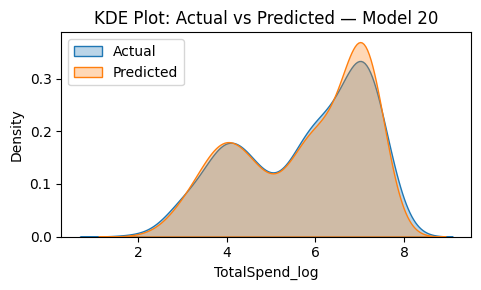

In [95]:
# ===============================
# 📊 Plots — Model 20 (XGBoost Regressor)
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# Distribution: Actual vs Predicted
# ------------------------------------------------------------
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 20")
plt.xlabel("TotalSpend_log")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# KDE: Actual vs Predicted
# ------------------------------------------------------------
plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 20")
plt.xlabel("TotalSpend_log")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


### 📋 Regression Models — Final Summary (Generic & Scalable)

In [260]:
# ============================================
# 📋 Regression Models – Final Summary
# ============================================

import pandas as pd

# Build summary DataFrame from model_log
df_summary = pd.DataFrame(model_log)

# Select and order key columns (safe if more columns exist)
summary_cols = [
    "Model",
    "R²_train",
    "R²_test",
    "R²_CV",
    "MSE_train",
    "MSE_test",
    "Feature_count"
]

df_summary = df_summary[summary_cols]


print("📊 Summary of All Regression Models:")
display(df_summary)


📊 Summary of All Regression Models:


,Model,R²_train,R²_test,R²_CV,MSE_train,MSE_test,Feature_count
0,Model 1 — Baseline Linear Regression (All Feat...,0.882,0.882,0.874,0.26,0.24,27.0
1,Model 2 — Linear Regression (EDA-based features),0.867,0.865,0.860,0.29,0.27,21.0
2,Model 3 — Ridge Regression (All Features),0.881,0.884,0.875,0.26,0.23,27.0
3,Model 4 — LassoCV (All Features),0.881,0.883,0.875,0.26,0.24,18.0
4,"Model 5 — Lasso (Fixed Alpha, All Features)",0.873,0.879,0.868,0.28,0.24,8.0
5,Model 6 — Linear Regression (Lasso-selected fe...,0.876,0.885,0.871,0.27,0.23,8.0
6,"Model 7 — Polynomial LR (deg=2, broad features)",0.960,0.956,0.919,0.09,0.09,93.0
7,"Model 8 — Polynomial Ridge (deg=2, broad featu...",0.956,0.957,0.928,0.10,0.09,93.0
8,"Model 9 — Polynomial LassoCV (deg=2, broad fea...",0.952,0.952,0.939,0.11,0.10,36.0
9,"Model 10 — Polynomial Lasso (deg=2, fixed α)",0.929,0.931,0.923,0.16,0.14,25.0


In [261]:
print("🏆 Models Sorted by Test R² (descending):")
display(
    df_summary
    .sort_values(by="R²_test", ascending=False)
    .reset_index(drop=True)
)


🏆 Models Sorted by Test R² (descending):


,Model,R²_train,R²_test,R²_CV,MSE_train,MSE_test,Feature_count
0,Model 20C — XGBoost Regressor (Tuned),0.996,0.974,0.965,0.01,0.05,NaN
1,Model 20 — XGBoost Regressor (Tuned),0.996,0.974,0.965,0.01,0.05,NaN
2,Model 17 — Tuned Random Forest (GridSearchCV),0.994,0.972,0.959,0.01,0.06,NaN
3,"Model 16 — Base Random Forest (200 trees, OOB)",0.994,0.972,0.959,0.01,0.06,NaN
4,Model 17C — Tuned Random Forest (GridSearchCV),0.994,0.971,0.959,0.01,0.06,NaN
5,"Model 16C — Base Random Forest (200 trees, OOB)",0.994,0.971,0.959,0.01,0.06,NaN
6,Model 19C — Gradient Boosting (baseline),0.978,0.967,0.959,0.05,0.07,NaN
7,Model 19 — Gradient Boosting (baseline),0.978,0.967,0.959,0.05,0.07,NaN
8,"Model 18C — SVR (RBF, Lasso-selected features)",0.972,0.963,0.947,0.06,0.08,8.0
9,"Model 18 — SVR (RBF, Lasso-selected features)",0.972,0.963,0.947,0.06,0.07,8.0


### 4.4 Model Robustness & Outlier Sensitivity

| Model Name                                             | Model No. | Outlier Sensitivity | Reason                                                                |
| ------------------------------------------------------ | --------- | ------------------- | --------------------------------------------------------------------- |
| Polynomial Linear Regression (deg=2, broad features)   | Model 7   | 🔴 **Very High**    | Squared loss + polynomial feature explosion amplify extreme values    |
| Polynomial Linear Regression (Lasso-selected features) | Model 11  | 🔴 **Very High**    | Polynomial interactions magnify leverage of outliers                  |
| Polynomial Lasso (deg=2, fixed α)                      | Model 10  | 🔴 **High**         | Polynomial terms remain sensitive despite sparsity                    |
| Polynomial LassoCV (deg=2)                             | Model 9   | 🔴 **High**         | Nonlinear expansion with squared error loss                           |
| Polynomial Ridge Regression (deg=2)                    | Model 8   | 🟠 **Medium–High**  | L2 regularization helps, but polynomial features remain sensitive     |
| Linear Regression (All Features)                       | Model 1   | 🟠 **Medium–High**  | Squared error directly influenced by extreme observations             |
| Linear Regression (EDA-based features)                 | Model 2   | 🟠 **Medium–High**  | Reduced features but same squared loss                                |
| Linear Regression (Lasso-selected features)            | Model 6   | 🟠 **Medium**       | Feature reduction lowers but does not remove sensitivity              |
| Ridge Regression (All Features)                        | Model 3   | 🟠 **Medium**       | Coefficient shrinkage mitigates but does not eliminate outlier impact |
| LassoCV (All Features)                                 | Model 4   | 🟠 **Medium**       | Sparsity reduces influence of noisy predictors                        |
| Lasso (Fixed Alpha, All Features)                      | Model 5   | 🟠 **Medium**       | Stronger sparsity, still squared loss                                 |
| SVR (RBF, Lasso-selected features)                     | Model 18  | 🟢 **Low–Medium**   | Kernel-based model, limited feature set                               |
| Regression Tree (Baseline)                             | Model 12  | 🟢 **Low**          | Split-based predictions, local influence                              |
| Tuned Regression Tree                                  | Model 13  | 🟢 **Low**          | Depth and leaf constraints stabilize splits                           |
| Regression Tree (CCP Pruned)                           | Model 14  | 🟢 **Low**          | Cost-complexity pruning reduces overreaction                          |
| Regression Tree (fixed ccp_alpha)                      | Model 15  | 🟢 **Low**          | Fixed pruning enforces stable structure                               |
| Random Forest (Base, 200 trees)                        | Model 16  | 🟢🟢 **Very Low**   | Bootstrap sampling + averaging                                        |
| Tuned Random Forest (GridSearchCV)                     | Model 17  | 🟢🟢 **Very Low**   | Ensemble averaging + regularization                                   |
| Gradient Boosting Regressor (baseline)                 | Model 19  | 🟢🟢 **Very Low**   | Sequential trees reduce single-point dominance                        |
| XGBoost Regressor (Tuned)                              | Model 20  | 🟢🟢🟢 **Lowest**   | Tree ensemble + regularization + subsampling                          |


**Observation**
As shown in the table above, 11 out of the 20 developed models exhibit sensitivity to outliers.
Based on the earlier EDA findings, this sensitivity is primarily driven by outliers in key variables such as income and age, where extreme values were clearly observed.

Given this evidence, continuing to compare all models without addressing these outliers could lead to misleading conclusions about relative model performance.
Therefore, to ensure a fairer and more reliable comparison, it is necessary to apply an explicit outlier-handling strategy (e.g., transformation, capping, or targeted treatment), particularly for income- and age-related extremes.

In the next step, model performance will be re-evaluated after handling outliers, allowing us to assess which models remain robust and stable once the influence of extreme values is reduced.

In [193]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Tenure_Days', 'Education_Level', 'TotalSpend', 'TotalSpend_log',
       'Income_log', 'Income_capped', 'Age_capped', 'Income_capped_log'],
      dtype='object')

In [211]:
# ============================================================
# Model 1C — Baseline Linear Regression (All Features, CV)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # log1p(TotalSpend), created in 4.2

# ------------------------------------------------------------
# 2) Feature sets — ALL reasonable features
# ------------------------------------------------------------

num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) Pipeline
# ------------------------------------------------------------
pipe_lr = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lr", LinearRegression())
    ]
)

# ------------------------------------------------------------
# 6) Cross-validation (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    pipe_lr,
    X_train,
    y_train,
    cv=cv,
    scoring="r2"
)
r2_cv_mean = cv_scores.mean()

# ------------------------------------------------------------
# 7) Fit final model
# ------------------------------------------------------------
pipe_lr.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lr.predict(X_train)
y_test_pred  = pipe_lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Feature count after OHE
# ------------------------------------------------------------
encoder = pipe_lr.named_steps["pre"].transformers_[1][1]
cat_feature_counts = [len(cats) - 1 for cats in encoder.categories_]
feature_count = len(num_cols) + sum(cat_feature_counts)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 1C — Baseline Linear Regression (All Features, CV)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 1CC — Baseline Linear Regression (All Features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count,
    notes="All features, log target, no outlier removal"
)


📊 Model 1C — Baseline Linear Regression (All Features, CV)
R² (train): 0.885
R² (test) : 0.884
R² (CV mean): 0.877
MSE (train): 0.25
MSE (test) : 0.23
Final feature count: 27


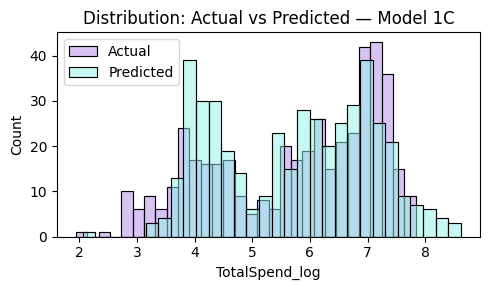

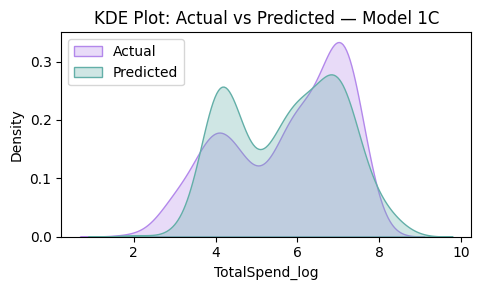

In [195]:

plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual",color="#B388EB", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted",color="#91F3E9FF", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 1C")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual",color="#B388EB", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted",color="#63AFA8FF", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 1C")
plt.legend()
plt.tight_layout()
plt.show()


In [212]:
# ============================================================
# Model 2C — Linear Regression (EDA-based features, CV)
# ============================================================

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Feature sets (EDA-based)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebPurchases",
    "NumWebVisitsMonth",
    "Kidhome",
    "Tenure_Days",
    "Age_capped"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp5",
    "AcceptedCmp1",
    "AcceptedCmp4",
    "Response"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
])

# ------------------------------------------------------------
# 5) Pipeline
# ------------------------------------------------------------
pipe_lr = Pipeline([
    ("pre", preprocessor),
    ("lr", LinearRegression())
])

# ------------------------------------------------------------
# 6) Cross-validation (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring="r2")
r2_cv_mean = cv_scores.mean()

# ------------------------------------------------------------
# 7) Fit final model
# ------------------------------------------------------------
pipe_lr.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lr.predict(X_train)
y_test_pred  = pipe_lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Feature count after OHE
# ------------------------------------------------------------
encoder = pipe_lr.named_steps["pre"].transformers_[1][1]
cat_feature_counts = [len(cats) - 1 for cats in encoder.categories_]
feature_count = len(num_cols) + sum(cat_feature_counts)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 2C — Linear Regression (EDA-based features, CV)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 2CC — Linear Regression (EDA-based features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count,
    notes="Log target, EDA-based features, no outlier removal"
)


📊 Model 2C — Linear Regression (EDA-based features, CV)
R² (train): 0.869
R² (test) : 0.866
R² (CV mean): 0.863
MSE (train): 0.29
MSE (test) : 0.27
Final feature count: 21


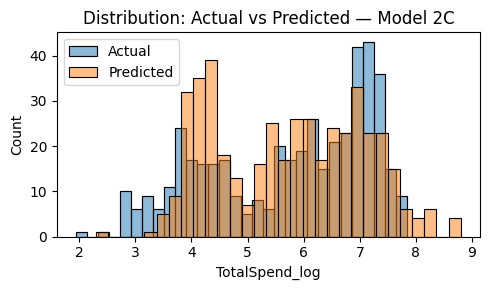

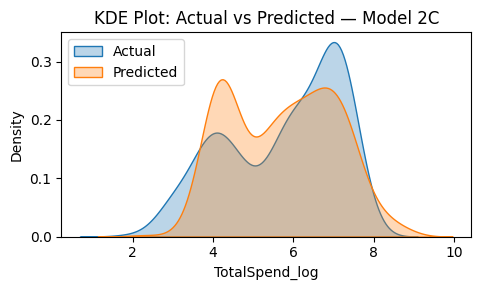

In [197]:
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 2C")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 2C")
plt.legend()
plt.tight_layout()
plt.show()


In [213]:
# ============================================================
# Model 4.3.3 C — Ridge Regression (All Features, CV)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Feature sets — SAME as Model 4.3.1 (All Features)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) RidgeCV (inner CV for alpha)
# ------------------------------------------------------------
alphas = np.logspace(-3, 3, 50)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = RidgeCV(
    alphas=alphas,
    cv=cv_inner,
    scoring="r2"
)

# ------------------------------------------------------------
# 6) Pipeline
# ------------------------------------------------------------
pipe_ridge = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("ridge", ridge)
    ]
)

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_ridge.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_ridge.predict(X_train)
y_test_pred  = pipe_ridge.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Outer CV (stability check)
# ------------------------------------------------------------
cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_ridge,
    X_train,
    y_train,
    cv=cv_outer,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 10) Feature count
# ------------------------------------------------------------
encoder = pipe_ridge.named_steps["pre"].transformers_[1][1]
cat_feature_counts = [len(cats) - 1 for cats in encoder.categories_]
feature_count = len(num_cols) + sum(cat_feature_counts)

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.3 C — Ridge Regression (All Features, CV)")
print(f"Best α: {pipe_ridge.named_steps['ridge'].alpha_:.5f}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 3CC — Ridge Regression (All Features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count,
    notes="All features, log target, RidgeCV"
)

📊 Model 4.3.3 C — Ridge Regression (All Features, CV)
Best α: 44.98433
R² (train): 0.884
R² (test) : 0.886
R² (CV mean): 0.878
MSE (train): 0.25
MSE (test) : 0.23
Final feature count: 27


In [208]:
# ============================================================
# Model 4.3.4 C — LassoCV (All Features, CV + Feature Selection)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Feature sets — SAME as Model 4.3.1 (All Features)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) LassoCV (inner CV for alpha selection)
# ------------------------------------------------------------
alphas = np.logspace(-4, 1, 50)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

lasso = LassoCV(
    alphas=alphas,
    cv=cv_inner,
    max_iter=50000,
    random_state=42
)

# ------------------------------------------------------------
# 6) Pipeline
# ------------------------------------------------------------
pipe_lasso = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lasso", lasso)
    ]
)

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_lasso.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lasso.predict(X_train)
y_test_pred  = pipe_lasso.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Outer CV (stability check)
# ------------------------------------------------------------
cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_lasso,
    X_train,
    y_train,
    cv=cv_outer,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 10) Selected (non-zero) features
# ------------------------------------------------------------
feature_names = pipe_lasso.named_steps["pre"].get_feature_names_out()
coefs = pipe_lasso.named_steps["lasso"].coef_

selected = [(n, c) for n, c in zip(feature_names, coefs) if c != 0]
selected_sorted = sorted(selected, key=lambda x: abs(x[1]), reverse=True)
n_selected = len(selected)

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.4 C — LassoCV (All Features, CV)")
print(f"Best α: {pipe_lasso.named_steps['lasso'].alpha_:.6f}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nSelected (non-zero) features: {n_selected} / {len(feature_names)}")
for name, coef in selected_sorted:
    print(f"  {name:45s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 4CC — LassoCV (All Features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=n_selected,
    notes="All features, log target, LassoCV feature selection"
)


📊 Model 4.3.4 C — LassoCV (All Features, CV)
Best α: 0.003393
R² (train): 0.884
R² (test) : 0.885
R² (CV mean): 0.878
MSE (train): 0.25
MSE (test) : 0.23

Selected (non-zero) features: 18 / 27
  num__Income_capped_log                         coef = +0.4114
  num__NumCatalogPurchases                       coef = +0.3741
  num__NumWebPurchases                           coef = +0.3671
  num__NumStorePurchases                         coef = +0.3218
  num__Kidhome                                   coef = -0.2440
  cat__AcceptedCmp4_1                            coef = +0.2120
  num__NumDealsPurchases                         coef = +0.2030
  num__Teenhome                                  coef = -0.1570
  cat__AcceptedCmp5_1                            coef = +0.1262
  num__Tenure_Days                               coef = +0.0844
  cat__Response_1                                coef = +0.0795
  cat__Education_Level_5                         coef = -0.0420
  num__NumWebVisitsMonth               

In [216]:
# ============================================================
# Model 4.3.5 C — Lasso Regression (Fixed Alpha, All Features)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Feature sets — SAME as Model 4.3.1 (All Features)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) Lasso with fixed alpha
# ------------------------------------------------------------
alpha_fixed = 0.03   # chosen based on LassoCV results (Model 4.3.4)

lasso_fixed = Lasso(
    alpha=alpha_fixed,
    max_iter=50000,
    random_state=42
)

# ------------------------------------------------------------
# 6) Pipeline
# ------------------------------------------------------------
pipe_lasso_fixed = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lasso", lasso_fixed)
    ]
)

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_lasso_fixed.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lasso_fixed.predict(X_train)
y_test_pred  = pipe_lasso_fixed.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) External CV (for comparison / display only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_lasso_fixed,
    X_train,
    y_train,
    cv=cv,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 10) Selected (non-zero) features
# ------------------------------------------------------------
feature_names = pipe_lasso_fixed.named_steps["pre"].get_feature_names_out()
coefs = pipe_lasso_fixed.named_steps["lasso"].coef_

selected = [(n, c) for n, c in zip(feature_names, coefs) if c != 0]
selected_sorted = sorted(selected, key=lambda x: abs(x[1]), reverse=True)
n_selected = len(selected)

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.5 C — Lasso Regression (Fixed Alpha)")
print(f"Alpha (fixed): {alpha_fixed}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}  ← display only")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nSelected (non-zero) features: {n_selected} / {len(feature_names)}")
for name, coef in selected_sorted:
    print(f"  {name:45s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 5C — Lasso (Fixed Alpha, All Features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=n_selected,
    notes="All features, log target, fixed alpha from LassoCV"
)


📊 Model 4.3.5 C — Lasso Regression (Fixed Alpha)
Alpha (fixed): 0.03
R² (train): 0.876
R² (test) : 0.882
R² (CV mean, 5-fold): 0.872  ← display only
MSE (train): 0.27
MSE (test) : 0.24

Selected (non-zero) features: 8 / 27
  num__NumCatalogPurchases                       coef = +0.4085
  num__Income_capped_log                         coef = +0.4015
  num__NumWebPurchases                           coef = +0.3625
  num__NumStorePurchases                         coef = +0.3324
  num__Kidhome                                   coef = -0.2171
  num__NumDealsPurchases                         coef = +0.1414
  num__Teenhome                                  coef = -0.1175
  num__Tenure_Days                               coef = +0.0682


In [219]:
# ============================================================
# Model 4.3.6 C— Linear Regression (Lasso-selected features, α = 0.03)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Lasso-selected features (α = 0.03)
# ------------------------------------------------------------
num_cols = [
    "NumCatalogPurchases",
    "Income_capped_log",
    "NumWebPurchases",
    "NumStorePurchases",
    "Kidhome",
    "NumDealsPurchases",
    "Teenhome",
    "Tenure_Days"
]

X = df[num_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor (numerical only)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)
    ]
)

# ------------------------------------------------------------
# 5) Pipeline: preprocessing + Linear Regression
# ------------------------------------------------------------
pipe_lr_lasso = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("linreg", LinearRegression())
    ]
)

# ------------------------------------------------------------
# 6) Cross-validated R² (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_lr_lasso,
    X_train,
    y_train,
    cv=cv,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_lr_lasso.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lr_lasso.predict(X_train)
y_test_pred  = pipe_lr_lasso.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Coefficient table
# ------------------------------------------------------------
coefs = pipe_lr_lasso.named_steps["linreg"].coef_
coef_table = sorted(
    zip(num_cols, coefs),
    key=lambda x: abs(x[1]),
    reverse=True
)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 4.3.6 C — Linear Regression (Lasso-selected features, α = 0.03)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nFinal feature count: {len(num_cols)}")
print("\nSelected coefficients (sorted by |coef|):")
for name, c in coef_table:
    print(f"{name:30s}  coef = {c:+.4f}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 6C — Linear Regression (Lasso-selected features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=len(num_cols),
    notes="Linear regression on 8 features selected by Lasso (α=0.03)"
)


📊 Model 4.3.6 C — Linear Regression (Lasso-selected features, α = 0.03)
R² (train): 0.879
R² (test) : 0.887
R² (CV mean, 5-fold): 0.875
MSE (train): 0.27
MSE (test) : 0.23

Final feature count: 8

Selected coefficients (sorted by |coef|):
Income_capped_log               coef = +0.4434
NumCatalogPurchases             coef = +0.3910
NumWebPurchases                 coef = +0.3644
NumStorePurchases               coef = +0.3229
Kidhome                         coef = -0.2550
NumDealsPurchases               coef = +0.2025
Teenhome                        coef = -0.1795
Tenure_Days                     coef = +0.0874


In [222]:
# ============================================================
# Model 4.3.7 C— Polynomial Linear Regression (degree = 2, broad features)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Broad feature set (baseline features)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - Polynomial only on numeric features
#    - Scaling AFTER polynomial expansion
# ------------------------------------------------------------
num_poly = Pipeline(
    steps=[
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler())
    ]
)

cat_ohe = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_poly, num_cols),
        ("cat", cat_ohe, cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) Pipeline
# ------------------------------------------------------------
pipe_poly = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("linreg", LinearRegression())
    ]
)

# ------------------------------------------------------------
# 6) Cross-validation (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_poly, X_train, y_train, cv=cv, scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_poly.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_poly.predict(X_train)
y_test_pred  = pipe_poly.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Feature count diagnostics
# ------------------------------------------------------------
pre_fitted = pipe_poly.named_steps["pre"]

n_num_after = (
    pre_fitted
    .named_transformers_["num"]
    .named_steps["poly"]
    .n_output_features_
)

n_cat_after = len(
    pre_fitted
    .named_transformers_["cat"]
    .get_feature_names_out(cat_cols)
)

n_total = n_num_after + n_cat_after

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 4.3.7 C — Polynomial Linear Regression (degree = 2)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print("\nFeature counts:")
print(f"  Numeric before:            {len(num_cols)}")
print(f"  Categorical before:        {len(cat_cols)}")
print(f"  Numeric after poly(deg=2): {n_num_after}")
print(f"  Categorical after OHE:     {n_cat_after}")
print(f"  TOTAL after preprocessing: {n_total}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 7C — Polynomial LR (deg=2, broad features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=n_total,
    notes="PolynomialFeatures(deg=2) applied to numeric variables only"
)

📊 Model 4.3.7 C — Polynomial Linear Regression (degree = 2)
R² (train): 0.960
R² (test) : 0.958
R² (CV mean): 0.931
MSE (train): 0.09
MSE (test) : 0.09

Feature counts:
  Numeric before:            11
  Categorical before:        9
  Numeric after poly(deg=2): 77
  Categorical after OHE:     16
  TOTAL after preprocessing: 93


In [225]:
# ============================================================
# Model 4.3.8 C— Polynomial Ridge Regression (degree = 2, broad features)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Broad feature set (same as baseline / Model 4.3.7)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - Polynomial expansion ONLY on numeric features
#    - Scaling AFTER polynomial expansion
# ------------------------------------------------------------
num_poly = Pipeline(
    steps=[
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
    ]
)

cat_ohe = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_poly, num_cols),
        ("cat", cat_ohe, cat_cols),
    ]
)

# ------------------------------------------------------------
# 5) RidgeCV configuration
# ------------------------------------------------------------
alphas = np.logspace(-2, 2, 50)
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = RidgeCV(
    alphas=alphas,
    cv=cv5,
    scoring="r2"
)

# ------------------------------------------------------------
# 6) Pipeline: preprocessing + RidgeCV
# ------------------------------------------------------------
pipe_ridge_poly = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("ridge", ridge),
    ]
)

# ------------------------------------------------------------
# 7) Cross-validated R² (train only)
# ------------------------------------------------------------
r2_cv_mean = cross_val_score(
    pipe_ridge_poly,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 8) Fit model
# ------------------------------------------------------------
pipe_ridge_poly.fit(X_train, y_train)

# ------------------------------------------------------------
# 9) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_ridge_poly.predict(X_train)
y_test_pred  = pipe_ridge_poly.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 10) Feature count diagnostics
# ------------------------------------------------------------
pre_fitted = pipe_ridge_poly.named_steps["pre"]

n_num_after = (
    pre_fitted
    .named_transformers_["num"]
    .named_steps["poly"]
    .n_output_features_
)

n_cat_after = len(
    pre_fitted
    .named_transformers_["cat"]
    .get_feature_names_out(cat_cols)
)

n_total = n_num_after + n_cat_after

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.8 C — Polynomial Ridge Regression (degree = 2)")
print(f"Best α: {pipe_ridge_poly.named_steps['ridge'].alpha_:.4f}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print("\nFeature counts:")
print(f"  Numeric before:            {len(num_cols)}")
print(f"  Categorical before:        {len(cat_cols)}")
print(f"  Numeric after poly(deg=2): {n_num_after}")
print(f"  Categorical after OHE:     {n_cat_after}")
print(f"  TOTAL after preprocessing: {n_total}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 8C — Polynomial Ridge (deg=2, broad features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=n_total,
    notes="PolynomialFeatures(deg=2) on numeric vars + RidgeCV"
)


📊 Model 4.3.8 C — Polynomial Ridge Regression (degree = 2)
Best α: 2.3300
R² (train): 0.958
R² (test) : 0.958
R² (CV mean): 0.933
MSE (train): 0.09
MSE (test) : 0.08

Feature counts:
  Numeric before:            11
  Categorical before:        9
  Numeric after poly(deg=2): 77
  Categorical after OHE:     16
  TOTAL after preprocessing: 93


In [228]:
# ============================================================
# Model 4.3.9 C — Polynomial LassoCV (degree = 2, broad features)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Broad feature set (baseline features)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - Polynomial expansion ONLY on numeric features
#    - Scaling AFTER polynomial expansion
# ------------------------------------------------------------
num_poly = Pipeline(
    steps=[
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
    ]
)

cat_ohe = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_poly, num_cols),
        ("cat", cat_ohe, cat_cols),
    ]
)

# ------------------------------------------------------------
# 5) LassoCV configuration
# ------------------------------------------------------------
alphas = np.logspace(-4, 1, 40)
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_cv = LassoCV(
    alphas=alphas,
    cv=cv5,
    max_iter=100000,
    random_state=42
)

# ------------------------------------------------------------
# 6) Pipeline: preprocessing + LassoCV
# ------------------------------------------------------------
pipe_lasso_poly = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lasso", lasso_cv),
    ]
)

# ------------------------------------------------------------
# 7) Cross-validated R² (train only)
# ------------------------------------------------------------
r2_cv_mean = cross_val_score(
    pipe_lasso_poly,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 8) Fit model
# ------------------------------------------------------------
pipe_lasso_poly.fit(X_train, y_train)

# ------------------------------------------------------------
# 9) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lasso_poly.predict(X_train)
y_test_pred  = pipe_lasso_poly.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 10) Coefficients & selected features
# ------------------------------------------------------------
feature_names = pipe_lasso_poly.named_steps["pre"].get_feature_names_out()
coefs = pipe_lasso_poly.named_steps["lasso"].coef_

non_zero_mask = np.abs(coefs) > 1e-8
selected_count = int(non_zero_mask.sum())

selected_features = [
    (name, coef)
    for name, coef in zip(feature_names, coefs)
    if abs(coef) > 1e-8
]

selected_sorted = sorted(
    selected_features,
    key=lambda x: abs(x[1]),
    reverse=True
)

# ------------------------------------------------------------
# 11) Report
# ------------------------------------------------------------
print("📊 Model 4.3.9 C — Polynomial LassoCV (degree = 2)")
print(f"Best α: {pipe_lasso_poly.named_steps['lasso'].alpha_:.6f}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nTotal features after preprocessing: {len(feature_names)}")
print(f"Selected (non-zero) features: {selected_count} / {len(feature_names)}")

print("\nTop non-zero coefficients (by |coef|):")
for name, coef in selected_sorted[:20]:
    print(f"{name:55s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 12) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 9C — Polynomial LassoCV (deg=2, broad features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=selected_count,
    notes="PolynomialFeatures(deg=2) on numeric vars + LassoCV"
)


📊 Model 4.3.9 C — Polynomial LassoCV (degree = 2)
Best α: 0.002572
R² (train): 0.956
R² (test) : 0.955
R² (CV mean): 0.944
MSE (train): 0.10
MSE (test) : 0.09

Total features after preprocessing: 93
Selected (non-zero) features: 50 / 93

Top non-zero coefficients (by |coef|):
num__NumCatalogPurchases                                 coef = +1.2004
num__NumWebPurchases                                     coef = +1.0712
num__Income_capped_log NumStorePurchases                 coef = +0.8969
num__NumCatalogPurchases NumStorePurchases               coef = -0.4267
num__NumCatalogPurchases^2                               coef = -0.4130
num__NumWebPurchases^2                                   coef = -0.4010
num__NumWebPurchases NumStorePurchases                   coef = -0.3820
num__NumWebVisitsMonth^2                                 coef = +0.3445
num__NumWebPurchases NumCatalogPurchases                 coef = -0.2994
num__NumStorePurchases^2                                 coef = -0.2695
num

In [235]:
# ============================================================
# Model 4.3.10 C — Polynomial Lasso (degree = 2, fixed alpha)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Broad feature set (baseline features)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
# ------------------------------------------------------------
num_poly = Pipeline(
    steps=[
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
    ]
)

cat_ohe = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_poly, num_cols),
        ("cat", cat_ohe, cat_cols),
    ]
)

# ------------------------------------------------------------
# 5) Fixed-alpha Lasso
# ------------------------------------------------------------
alpha_fixed = 0.016   # ≈ نزدیک Best alpha از LassoCV

lasso_fixed = Lasso(
    alpha=alpha_fixed,
    max_iter=100_000,
    random_state=42
)

pipe_lasso_poly_fixed = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lasso", lasso_fixed),
    ]
)

# ------------------------------------------------------------
# 6) Fit model
# ------------------------------------------------------------
pipe_lasso_poly_fixed.fit(X_train, y_train)

# ------------------------------------------------------------
# 7) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lasso_poly_fixed.predict(X_train)
y_test_pred  = pipe_lasso_poly_fixed.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 8) Cross-validated R² (train only, for comparison)
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    pipe_lasso_poly_fixed,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 9) Coefficients & selected features
# ------------------------------------------------------------
feature_names = pipe_lasso_poly_fixed.named_steps["pre"].get_feature_names_out()
coefs = pipe_lasso_poly_fixed.named_steps["lasso"].coef_

non_zero_mask = np.abs(coefs) > 1e-8
selected_count = int(non_zero_mask.sum())

selected_features = [
    (name, coef)
    for name, coef in zip(feature_names, coefs)
    if abs(coef) > 1e-8
]

selected_sorted = sorted(
    selected_features,
    key=lambda x: abs(x[1]),
    reverse=True
)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print(f"🍀 Model 4.3.10 C — Polynomial Lasso (deg=2, α = {alpha_fixed})")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

print(f"\nSelected (non-zero) features: {selected_count} / {len(feature_names)}")
print("\nTop selected features (by |coef|):")
for name, coef in selected_sorted[:25]:
    print(f"{name:60s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 10C1 — Polynomial Lasso (deg=2, fixed α)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=selected_count
)


🍀 Model 4.3.10 C — Polynomial Lasso (deg=2, α = 0.016)
R² (train): 0.930
R² (test) : 0.931
R² (CV mean): 0.925
MSE (train): 0.15
MSE (test) : 0.14

Selected (non-zero) features: 25 / 93

Top selected features (by |coef|):
num__NumCatalogPurchases                                      coef = +0.9054
num__NumWebPurchases                                          coef = +0.6707
num__NumStorePurchases                                        coef = +0.4830
num__Income_capped_log^2                                      coef = +0.3676
num__NumCatalogPurchases^2                                    coef = -0.2857
num__Income_capped_log Kidhome                                coef = -0.2785
num__NumCatalogPurchases NumStorePurchases                    coef = -0.2054
num__NumWebPurchases^2                                        coef = -0.2024
num__NumWebPurchases NumStorePurchases                        coef = -0.1835
num__NumWebPurchases NumCatalogPurchases                      coef = -0.1625
num__Inc

📊 Model 4.3.11 C — Linear Regression (Poly, Lasso-selected, CAPPED)
R² (train): 0.949
R² (test) : 0.948
R² (CV mean, 5-fold): 0.945
MSE (train): 0.11
MSE (test) : 0.10
Final feature count: 25

Top coefficients (by |coef|):
num__NumCatalogPurchases                                      coef = +1.4565
num__NumWebPurchases                                          coef = +1.1040
num__NumCatalogPurchases NumStorePurchases                    coef = -0.6148
num__Income_capped_log NumStorePurchases                      coef = +0.5653
num__NumWebPurchases NumStorePurchases                        coef = -0.5196
num__NumCatalogPurchases^2                                    coef = -0.5171
num__NumWebPurchases^2                                        coef = -0.4138
num__NumStorePurchases                                        coef = +0.3011
num__Income_capped_log^2                                      coef = +0.2746
num__NumWebPurchases NumCatalogPurchases                      coef = -0.2562
num__Nu

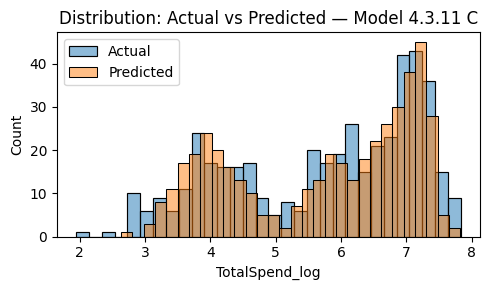

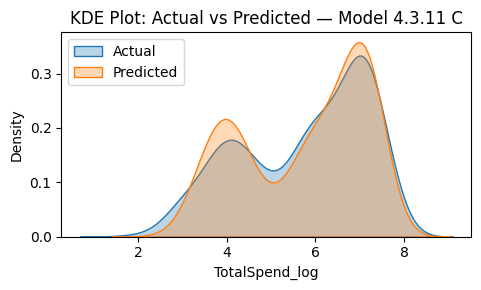

In [238]:
# ============================================================
# Model 4.3.11 C — Linear Regression
# (Polynomial feature space, Lasso-selected, CAPPED variables)
# ============================================================

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"
y = df[target].copy()

# ------------------------------------------------------------
# 2) Transform X into polynomial feature space
#    (same preprocessor used in Model 4.3.10)
# ------------------------------------------------------------
X_raw = df[num_cols + cat_cols].copy()

X_poly = pipe_lasso_poly_fixed.named_steps["pre"].transform(X_raw)

feature_names_poly = (
    pipe_lasso_poly_fixed
    .named_steps["pre"]
    .get_feature_names_out()
)

# ------------------------------------------------------------
# 3) Select polynomial features kept by Lasso
#    Drop raw Income / Income_log / Age
#    Keep capped versions instead
# ------------------------------------------------------------
coefs = pipe_lasso_poly_fixed.named_steps["lasso"].coef_

drop_keywords = [
    "num__Income",
    "num__Income_log",
    "num__Age"
]

keep_keywords = [
    "num__Income_capped",
    "num__Income_capped_log",
    "num__Age_capped"
]

selected_indices = []
selected_feature_names = []

for i, (c, fname) in enumerate(zip(coefs, feature_names_poly)):
    if abs(c) <= 1e-8:
        continue

    # Drop raw income / age unless it is a capped version
    if any(fname == k or fname.startswith(k + "^") for k in drop_keywords):
        if not any(kk in fname for kk in keep_keywords):
            continue

    selected_indices.append(i)
    selected_feature_names.append(fname)

X_poly_selected = X_poly[:, selected_indices]
feature_count = len(selected_indices)

# ------------------------------------------------------------
# 4) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_poly_selected,
    y,
    test_size=0.20,
    random_state=42
)

# ------------------------------------------------------------
# 5) Linear Regression model
# ------------------------------------------------------------
lin_reg = LinearRegression()

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv_mean = cross_val_score(
    lin_reg,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

lin_reg.fit(X_train, y_train)

# ------------------------------------------------------------
# 6) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = lin_reg.predict(X_train)
y_test_pred  = lin_reg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 7) Coefficient table (polynomial space)
# ------------------------------------------------------------
coef_table = sorted(
    zip(selected_feature_names, lin_reg.coef_),
    key=lambda x: abs(x[1]),
    reverse=True
)

# ------------------------------------------------------------
# 8) Report
# ------------------------------------------------------------
print("📊 Model 4.3.11 C — Linear Regression (Poly, Lasso-selected, CAPPED)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

print("\nTop coefficients (by |coef|):")
for name, coef in coef_table[:20]:
    print(f"{name:60s}  coef = {coef:+.4f}")

# ------------------------------------------------------------
# 9) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 11C — Linear Regression (Poly, Lasso-selected, capped)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count
)

# ------------------------------------------------------------
# 10) Distribution & KDE plots
# ------------------------------------------------------------
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 4.3.11 C")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 4.3.11 C")
plt.legend()
plt.tight_layout()
plt.show()


In [241]:
# ============================================================
# Model 4.3.12 C— Regression Tree (DecisionTreeRegressor + CV)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature set (same baseline features used earlier)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - One-hot encode categorical features
#    - Keep numeric features unchanged (trees do not need scaling)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Decision Tree model
# ------------------------------------------------------------
tree_model = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

pipe_tree = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("tree", tree_model)
    ]
)

# ------------------------------------------------------------
# 6) Cross-validated R² (train only)
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

r2_cv_mean = cross_val_score(
    pipe_tree,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_tree.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_tree.predict(X_train)
y_test_pred  = pipe_tree.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Tree diagnostics
# ------------------------------------------------------------
tree_estimator = pipe_tree.named_steps["tree"]
tree_depth = tree_estimator.get_depth()
tree_leaves = tree_estimator.get_n_leaves()

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌳 Model 4.3.12 C— Regression Tree (DecisionTreeRegressor)")
print(f"Tree depth: {tree_depth}")
print(f"Number of leaves: {tree_leaves}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 12C — Regression Tree",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=tree_leaves
    #feature_count= 20
)


🌳 Model 4.3.12 C— Regression Tree (DecisionTreeRegressor)
Tree depth: 24
Number of leaves: 1611
R² (train): 1.000
R² (test) : 0.942
R² (CV mean, 5-fold): 0.923
MSE (train): 0.00
MSE (test) : 0.12


In [244]:
# ============================================================
# Model 4.3.13 C — Tuned Regression Tree (GridSearchCV + CV)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature set (updated baseline features)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - One-hot encode categorical features
#    - Keep numeric features unchanged
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Base tree model
# ------------------------------------------------------------
base_tree = DecisionTreeRegressor(random_state=42)

pipe_tree = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("tree", base_tree),
    ]
)

# ------------------------------------------------------------
# 6) Hyperparameter grid
# ------------------------------------------------------------
param_grid = {
    "tree__max_depth": [4, 6, 8, 10, 12],
    "tree__min_samples_leaf": [2, 4, 6, 8],
    "tree__min_samples_split": [2, 5, 10],
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipe_tree,
    param_grid=param_grid,
    cv=cv5,
    scoring="r2",
    n_jobs=-1,
)

# ------------------------------------------------------------
# 7) Fit GridSearch
# ------------------------------------------------------------
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Tree diagnostics
# ------------------------------------------------------------
best_tree = best_model.named_steps["tree"]
tree_depth = best_tree.get_depth()
tree_leaves = best_tree.get_n_leaves()

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌳 Model 4.3.13C — Tuned Regression Tree (GridSearchCV)")
print("Best parameters:", best_params)
print(f"Tree depth: {tree_depth}")
print(f"Number of leaves: {tree_leaves}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {best_cv_score:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 13C — Tuned Regression Tree",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=best_cv_score,
    feature_count=tree_leaves
    #feature_count=20
)


🌳 Model 4.3.13C — Tuned Regression Tree (GridSearchCV)
Best parameters: {'tree__max_depth': 8, 'tree__min_samples_leaf': 6, 'tree__min_samples_split': 2}
Tree depth: 8
Number of leaves: 133
R² (train): 0.968
R² (test) : 0.956
R² (CV mean, 5-fold): 0.943
MSE (train): 0.07
MSE (test) : 0.09


In [247]:
#if False:
# ============================================================
# 🌳 Model 4.3.14 C— Regression Tree (Cost-Complexity Pruning + CV)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature sets (FINAL agreed set)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing (OHE for categorical, numeric passthrough)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Fit unpruned tree to obtain CCP path
# ------------------------------------------------------------
base_tree = DecisionTreeRegressor(random_state=42)

pipe_base = Pipeline([
    ("pre", preprocessor),
    ("tree", base_tree),
])

pipe_base.fit(X_train, y_train)

tree_estimator = pipe_base.named_steps["tree"]

X_train_transformed = pipe_base.named_steps["pre"].transform(X_train)

ccp_path = tree_estimator.cost_complexity_pruning_path(
    X_train_transformed, y_train
)

ccp_alphas = ccp_path.ccp_alphas[:-1]  # drop trivial last alpha

# ------------------------------------------------------------
# 6) Cross-validation to select best ccp_alpha
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []

for alpha in ccp_alphas:
    tree_tmp = DecisionTreeRegressor(
        random_state=42,
        ccp_alpha=alpha
    )
    pipe_tmp = Pipeline([
        ("pre", preprocessor),
        ("tree", tree_tmp),
    ])
    score = cross_val_score(
        pipe_tmp,
        X_train,
        y_train,
        cv=cv5,
        scoring="r2"
    ).mean()
    cv_scores.append(score)

best_alpha = ccp_alphas[np.argmax(cv_scores)]
best_cv_score = np.max(cv_scores)

# ------------------------------------------------------------
# 7) Refit best pruned tree
# ------------------------------------------------------------
final_tree = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=best_alpha
)

pipe_tree_pruned = Pipeline([
    ("pre", preprocessor),
    ("tree", final_tree),
])

pipe_tree_pruned.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_tree_pruned.predict(X_train)
y_test_pred  = pipe_tree_pruned.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Final tree characteristics
# ------------------------------------------------------------
tree_final = pipe_tree_pruned.named_steps["tree"]
tree_depth = tree_final.get_depth()
tree_leaves = tree_final.get_n_leaves()

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌳 Model 4.3.14 C— Regression Tree (CCP Pruning + CV)")
print(f"Best ccp_alpha: {best_alpha:.6f}")
print(f"Tree depth: {tree_depth}")
print(f"Leaf nodes: {tree_leaves}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test):  {r2_test:.3f}")
print(f"Best CV R² (5-fold): {best_cv_score:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test):  {mse_test:.2f}")

# ------------------------------------------------------------
# 11) Log result (MODEL NUMBERING INTENTIONAL)
# ------------------------------------------------------------
log_model_result(
    name="Model 14C — Regression Tree (CCP Pruned)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=best_cv_score,
    feature_count=tree_leaves
)


🌳 Model 4.3.14 C— Regression Tree (CCP Pruning + CV)
Best ccp_alpha: 0.000416
Tree depth: 10
Leaf nodes: 82
R² (train): 0.975
R² (test):  0.947
Best CV R² (5-fold): 0.930
MSE (train): 0.06
MSE (test):  0.11


In [248]:
# ============================================================
# 🌳 Model 4.3.15 C — Regression Tree (fixed ccp_alpha + CV)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature sets (FINAL agreed set)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing (OHE for categorical, numeric passthrough)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Fixed ccp_alpha (from Model 4.3.14)
# ------------------------------------------------------------
ccp_alpha_fixed = 0.000416

tree_fixed = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=ccp_alpha_fixed
)

pipe_tree_fixed = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("tree", tree_fixed),
    ]
)

# ------------------------------------------------------------
# 6) Cross-validated R² on TRAIN (for display)
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

r2_cv_mean = cross_val_score(
    pipe_tree_fixed,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_tree_fixed.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_tree_fixed.predict(X_train)
y_test_pred  = pipe_tree_fixed.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Final tree characteristics
# ------------------------------------------------------------
tree_final = pipe_tree_fixed.named_steps["tree"]
tree_depth = tree_final.get_depth()
tree_leaves = tree_final.get_n_leaves()

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌳 Model 4.3.15 C— Regression Tree (fixed ccp_alpha)")
print(f"Fixed ccp_alpha: {ccp_alpha_fixed}")
print(f"Tree depth: {tree_depth}")
print(f"Leaf nodes: {tree_leaves}")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test):  {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test):  {mse_test:.2f}")

# ------------------------------------------------------------
# 11) Log result
# ------------------------------------------------------------
log_model_result(
    name="Model 15C — Regression Tree (fixed ccp_alpha)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=tree_leaves,
    notes=f"Fixed ccp_alpha = {ccp_alpha_fixed} (from Model 4.3.14)"
)


🌳 Model 4.3.15 C— Regression Tree (fixed ccp_alpha)
Fixed ccp_alpha: 0.000416
Tree depth: 11
Leaf nodes: 84
R² (train): 0.975
R² (test):  0.946
R² (CV mean, 5-fold): 0.930
MSE (train): 0.05
MSE (test):  0.11


In [251]:
# ============================================================
# 🌲 Model 4.3.16 C— Base Random Forest Regressor (200 trees, OOB)
# ============================================================

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Features (same as Models 4.3.13–4.3.15)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

target = "TotalSpend_log"

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 2) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 3) Preprocessing (OHE for categorical only)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 4) Random Forest model
# ------------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    oob_score=True,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

model16 = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", rf),
])

# ------------------------------------------------------------
# 5) Fit
# ------------------------------------------------------------
model16.fit(X_train, y_train)

# ------------------------------------------------------------
# 6) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = model16.predict(X_train)
y_test_pred  = model16.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

oob_r2 = model16.named_steps["rf"].oob_score_

# ------------------------------------------------------------
# 7) Report
# ------------------------------------------------------------
print("🌲 Model 4.3.16 C— Base Random Forest (200 trees, OOB)")
print(f"OOB R²:       {oob_r2:.3f}")
print(f"R² (train):   {r2_train:.3f}")
print(f"R² (test):    {r2_test:.3f}")
print(f"MSE (train):  {mse_train:.3f}")
print(f"MSE (test):   {mse_test:.3f}")

# ------------------------------------------------------------
# 8) Log
# ------------------------------------------------------------
log_model_result(
    "Model 16C — Base Random Forest (200 trees, OOB)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=oob_r2,
    feature_count=None
)


🌲 Model 4.3.16 C— Base Random Forest (200 trees, OOB)
OOB R²:       0.959
R² (train):   0.994
R² (test):    0.971
MSE (train):  0.012
MSE (test):   0.058


In [252]:
# ============================================================
# 🌲 Model 4.3.17 c— Tuned Random Forest Regressor (GridSearchCV)
# ============================================================

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Features (same as Models 4.3.13–4.3.16)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

target = "TotalSpend_log"

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 2) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 3) Preprocessing (OHE for categorical only)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 4) Base Random Forest (200 trees)
# ------------------------------------------------------------
base_forest = RandomForestRegressor(
    n_estimators=200,
    oob_score=True,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

pipe_forest = Pipeline([
    ("preprocessor", preprocessor),
    ("forest", base_forest),
])

# ------------------------------------------------------------
# 5) Hyperparameter grid
# ------------------------------------------------------------
param_grid = {
    "forest__max_depth": [None, 10, 15, 20],
    "forest__min_samples_split": [2, 5, 10],
    "forest__min_samples_leaf": [1, 2, 4],
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipe_forest,
    param_grid=param_grid,
    cv=cv5,
    scoring="r2",
    n_jobs=-1
)

# ------------------------------------------------------------
# 6) Fit GridSearchCV
# ------------------------------------------------------------
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_r2 = grid_search.best_score_

# ------------------------------------------------------------
# 7) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 8) Forest diagnostics
# ------------------------------------------------------------
forest = best_model.named_steps["forest"]

oob_r2 = forest.oob_score_

tree_depths = [est.tree_.max_depth for est in forest.estimators_]
mean_depth = float(np.mean(tree_depths))

leaf_counts = [(est.tree_.children_left == -1).sum() for est in forest.estimators_]
mean_leaves = float(np.mean(leaf_counts))

# ------------------------------------------------------------
# 9) Report
# ------------------------------------------------------------
print("🌲 Model 4.3.17 C— Tuned Random Forest (GridSearchCV)")
print(f"Best params:                 {best_params}")
print(f"OOB R²:                      {oob_r2:.3f}")
print(f"R² (train):                  {r2_train:.3f}")
print(f"R² (test):                   {r2_test:.3f}")
print(f"Best CV R² (5-fold):         {best_cv_r2:.3f}")
print(f"MSE (train):                 {mse_train:.3f}")
print(f"MSE (test):                  {mse_test:.3f}")
print(f"Mean tree depth:             {mean_depth:.1f}")
print(f"Mean leaf nodes per tree:    {mean_leaves:.1f}")

# ------------------------------------------------------------
# 10) Log
# ------------------------------------------------------------
log_model_result(
    "Model 17C — Tuned Random Forest (GridSearchCV)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=best_cv_r2,
    feature_count=None
)


🌲 Model 4.3.17 C— Tuned Random Forest (GridSearchCV)
Best params:                 {'forest__max_depth': 20, 'forest__min_samples_leaf': 1, 'forest__min_samples_split': 2}
OOB R²:                      0.958
R² (train):                  0.994
R² (test):                   0.971
Best CV R² (5-fold):         0.959
MSE (train):                 0.012
MSE (test):                  0.058
Mean tree depth:             20.0
Mean leaf nodes per tree:    1047.0


In [255]:
# ===============================
# 🌊 Model 4.3.18 C— SVR (RBF) on reduced sample
#           with 8 Lasso-selected features
# ===============================
#
# NOTE:
# - To keep SVR (RBF) computationally reasonable, we:
#   1) Use only 8 features selected by Lasso (Model 5).
#   2) Train on a random subset of ~250 samples instead of the full dataset.
# - Target is still TotalSpend_log to stay consistent with previous models.
# 
import numpy as np
import pandas as pd

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Lasso-selected features (from Model 4.3.5 / 4.3.6)
# ------------------------------------------------------------
numeric_features_18 = [
    "NumCatalogPurchases",
    "Income_capped_log",
    "NumWebPurchases",
    "NumStorePurchases",
    "Kidhome",
    "NumDealsPurchases",
    "Teenhome",
    "Tenure_Days",
]

# ------------------------------------------------------------
# 3) Data
# ------------------------------------------------------------
X = df[numeric_features_18].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 4) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 5) Preprocessing
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_18),
    ]
)

# ------------------------------------------------------------
# 6) SVR pipeline
# ------------------------------------------------------------
pipe_svr_18 = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("svr", SVR(kernel="rbf")),
    ]
)

# ------------------------------------------------------------
# 7) GridSearchCV
# ------------------------------------------------------------
param_grid_18 = {
    "svr__C": [0.1, 1, 10],
    "svr__gamma": ["scale", 0.1, 0.01],
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

grid_18 = GridSearchCV(
    estimator=pipe_svr_18,
    param_grid=param_grid_18,
    cv=cv5,
    scoring="r2",
    n_jobs=-1,
)

# ------------------------------------------------------------
# 8) Fit
# ------------------------------------------------------------
grid_18.fit(X_train, y_train)

best_model_18 = grid_18.best_estimator_
best_params_18 = grid_18.best_params_
best_cv_r2_18 = grid_18.best_score_

# ------------------------------------------------------------
# 9) Predictions & metrics
# ------------------------------------------------------------
y_train_pred_18 = best_model_18.predict(X_train)
y_test_pred_18  = best_model_18.predict(X_test)

r2_train_18 = r2_score(y_train, y_train_pred_18)
r2_test_18  = r2_score(y_test,  y_test_pred_18)

mse_train_18 = mean_squared_error(y_train, y_train_pred_18)
mse_test_18  = mean_squared_error(y_test,  y_test_pred_18)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("🌊 Model 4.3.18 C— SVR (RBF, Lasso-selected features)")
print(f"Best params: {best_params_18}")
print(f"R² (train): {r2_train_18:.3f}")
print(f"R² (test) : {r2_test_18:.3f}")
print(f"R² (CV mean, 5-fold): {best_cv_r2_18:.3f}")
print(f"MSE (train): {mse_train_18:.3f}")
print(f"MSE (test) : {mse_test_18:.3f}")
print(f"Feature count: {len(numeric_features_18)}")

# ------------------------------------------------------------
# 11) Log
# ------------------------------------------------------------
log_model_result(
    name="Model 18C — SVR (RBF, Lasso-selected features)",
    r2_train=r2_train_18,
    r2_test=r2_test_18,
    mse_train=mse_train_18,
    mse_test=mse_test_18,
    r2_cv=best_cv_r2_18,
    feature_count=len(numeric_features_18),
)


🌊 Model 4.3.18 C— SVR (RBF, Lasso-selected features)
Best params: {'svr__C': 10, 'svr__gamma': 0.1}
R² (train): 0.972
R² (test) : 0.963
R² (CV mean, 5-fold): 0.947
MSE (train): 0.062
MSE (test) : 0.076
Feature count: 8


In [258]:
# ============================================================
# 🌱 Model 4.3.19 C— Gradient Boosting Regressor (Baseline)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature set (same baseline features as previous tree models)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing (OHE for categorical, numeric passthrough)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Gradient Boosting Regressor (baseline parameters)
# ------------------------------------------------------------
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=1.0,
    random_state=42
)

pipe_gbr = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("gbr", gbr)
    ]
)

# ------------------------------------------------------------
# 6) Cross-validated R² on TRAIN (leak-free)
# ------------------------------------------------------------
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

r2_cv_mean = cross_val_score(
    pipe_gbr,
    X_train,
    y_train,
    cv=cv5,
    scoring="r2"
).mean()

# ------------------------------------------------------------
# 7) Fit model
# ------------------------------------------------------------
pipe_gbr.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_gbr.predict(X_train)
y_test_pred  = pipe_gbr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Report
# ------------------------------------------------------------
print("🌱 Model 4.3.19 C— Gradient Boosting Regressor (Baseline)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

# ------------------------------------------------------------
# 10) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 19C — Gradient Boosting (baseline)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=None,
    notes="Baseline Gradient Boosting, no hyperparameter tuning"
)


🌱 Model 4.3.19 C— Gradient Boosting Regressor (Baseline)
R² (train): 0.978
R² (test) : 0.967
R² (CV mean, 5-fold): 0.959
MSE (train): 0.05
MSE (test) : 0.07


In [259]:
# ===============================
# 🚀 Model 20C — XGBoost Regressor (Tuned, CV)
# ===============================

import numpy as np
import pandas as pd

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"

# ------------------------------------------------------------
# 2) Feature set (FINAL, CONFIRMED)
# ------------------------------------------------------------
num_cols = [
    "Income_capped_log",
    "Age_capped",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train / Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessing
#    - OHE for categorical
#    - Numeric passthrough (tree-based)
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ],
    remainder="passthrough"
)

# ------------------------------------------------------------
# 5) Base XGBoost regressor
# ------------------------------------------------------------
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

pipe_xgb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("xgb", xgb_base)
    ]
)

# ------------------------------------------------------------
# 6) Hyperparameter grid (controlled & reasonable)
# ------------------------------------------------------------
param_grid = {
    "xgb__n_estimators": [200, 400],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.05, 0.1],
    "xgb__subsample": [0.8, 1.0],
    "xgb__colsample_bytree": [0.8, 1.0]
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid,
    cv=cv5,
    scoring="r2",
    n_jobs=-1
)

# ------------------------------------------------------------
# 7) Fit GridSearchCV
# ------------------------------------------------------------
grid_xgb.fit(X_train, y_train)

best_model_20 = grid_xgb.best_estimator_
best_params_20 = grid_xgb.best_params_
best_cv_20 = grid_xgb.best_score_

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = best_model_20.predict(X_train)
y_test_pred  = best_model_20.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Report
# ------------------------------------------------------------
print("🚀 Model 20C — XGBoost Regressor (Tuned)")
print("Best parameters:")
for k, v in best_params_20.items():
    print(f"  {k}: {v}")

print(f"\nR² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean, 5-fold): {best_cv_20:.3f}")
print(f"MSE (train): {mse_train:.3f}")
print(f"MSE (test) : {mse_test:.3f}")

# ------------------------------------------------------------
# 10) Log result
# ------------------------------------------------------------
log_model_result(
    name="Model 20C — XGBoost Regressor (Tuned)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=best_cv_20,
    feature_count=None,
    notes="Same feature set as final linear / tree / RF models"
)


🚀 Model 20C — XGBoost Regressor (Tuned)
Best parameters:
  xgb__colsample_bytree: 1.0
  xgb__learning_rate: 0.05
  xgb__max_depth: 5
  xgb__n_estimators: 400
  xgb__subsample: 0.8

R² (train): 0.996
R² (test) : 0.974
R² (CV mean, 5-fold): 0.965
MSE (train): 0.008
MSE (test) : 0.053
